In [1]:
%reload_ext autoreload
%autoreload 2
import leidenalg
import igraph as ig
import networkx as nx
from pyeed.network import SequenceNetwork
from pyeed.core import ProteinRecord
import os 
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)
import matplotlib as mpl

from Bio import SeqIO

create a list of all proteins from the json files   
the list contains ProteinRecords 

In [2]:
current_path = os.getcwd()
print(current_path)

input_folder_filters_regions = os.path.join(current_path, "proteins")
read_blast_folder = os.path.join(current_path, "proteins")
#read_blast_folder = os.path.join(current_path, "PHA_Depolymerasen", "proteins")

protein_list = []
counter = 0
for file in os.listdir(read_blast_folder):
    if file.endswith(".json"):
        try:
            with open(os.path.join(input_folder_filters_regions, file), "r") as f:
                file_data = ProteinRecord.from_json(f)
                protein_list.append(file_data)

        except: 
            print(f"No directory: {file}")
        
        counter += 1

/Users/alinalacheim/Documents/Dokumente/SimTech/5_Semester/Projektarbeit/PHA_Depolymerasen


append the proteins from the old database to the beloging list

In [3]:
family_1 = []
family_2 = []
family_3 = []
family_4 = []
family_5 = []
family_6 = []
family_7 = []

#family 1
with open("./PHA_fasta/family_1.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_1.append(record.id)

#family 2
with open("./PHA_fasta/family_2.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_2.append(record.id)

#family 3
with open("./PHA_fasta/family_3.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_3.append(record.id)

#family 4
with open("./PHA_fasta/family_4.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_4.append(record.id)

#family 5
with open("./PHA_fasta/family_5.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_5.append(record.id)

# family 6
with open("./PHA_fasta/family_6.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_6.append(record.id)

#family 7
with open("./PHA_fasta/family_7.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        family_7.append(record.id)

create a list with ProteinRecords with the old proteins  

In [4]:
current_path = os.getcwd()
print(current_path)

input_folder_filters_regions = os.path.join(current_path, "PHA_fasta", "protein_records")
read_blast_folder = os.path.join(current_path, "PHA_fasta", "protein_records")
#read_blast_folder = os.path.join(current_path, "PHA_Depolymerasen", "proteins")

old_proteins = []
counter = 0
for file in os.listdir(read_blast_folder):
    if file.endswith(".json"):
        try:
            with open(os.path.join(input_folder_filters_regions, file), "r") as f:
                file_data = ProteinRecord.from_json(f)
                old_proteins.append(file_data)

        except: 
            print(f"Cannot open: {file}")
        
        counter += 1

/Users/alinalacheim/Documents/Dokumente/SimTech/5_Semester/Projektarbeit/PHA_Depolymerasen


only use proteins with a lenght between 200-500 (one domain)

In [5]:
lenght = []
filtered_proteins = []
for protein in old_proteins: 
    lenght.append(len(protein.sequence))
    if len(protein.sequence) >= 200 and len(protein.sequence) <= 500: 
        filtered_proteins.append(protein)

In [6]:
print(len(filtered_proteins))

663


create a fasta with the lenght filtered proteins to create the clustering in the terminal  
don't run this  

In [7]:
counter = 0
with open("./length_filtered_old_200-500.fasta",'w') as f: 
    
    for protein in filtered_proteins: 
        
        f.write(">" + filtered_proteins[counter].id + "\n" +filtered_proteins[counter].sequence + "\n")
        counter += 1

filtered proteins with identity=0.38, coverage=0.8, cov mode 0

In [9]:
rep_id = []
with open("./cluster_lenght_filtered_rep_seq.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)

with open("./cluster_lenght_filtered_old_rep_seq.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)

In [10]:
print(len(rep_id))

61955


In [9]:
protein_list.extend(old_proteins)
len(protein_list)

67668

In [10]:
representatives = []
for protein in protein_list: 
    for rep in rep_id: 
        if protein.id == rep: 
            representatives.append(protein)

print(len(representatives))

3474


create the Sequence network with all representatives 

In [11]:
network = SequenceNetwork(sequences=representatives, weight='identity')

Output()

this does not work at the moment   

  
The Sequence network should be saved as a json file 

In [13]:
data_string = network.model_dump_json()

with open("./network/network.json", 'w') as f: 
    f.write(data_string)

In [ ]:
# df = nx.to_pandas_edgelist(G)
# print(df.columns)
# df.plot.hist(column=['identity'], bins=30)

update the threshold (number between 0-1)  
create the graph of the network   
set the weight 

In [80]:
network.update_threshhold(threshold = 0.25)
# naming the network
G = network.network
weight = 'identity'

In [55]:
#G.remove_nodes_from(list(nx.isolates(G)))
#low_degree = [n for n, d in G.degree() if d < 4]
#G.remove_nodes_from(low_degree)
#G.remove_nodes_from(network.remove_pairs())

Create a color map.  
Each family has their own color and all new proteins from the BLAST search have one color 

In [56]:
# use the matplotlib plasma colormap
color_map = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []

# node color varies with Degree
for v in G: 
    if v in family_1: 
        color_map.append('limegreen')
        cluster_1.append(v)
    elif v in family_2: 
        color_map.append('blue')
        cluster_2.append(v)
    elif v in family_3: 
        color_map.append('lightblue')
        cluster_3.append(v)
    elif v in family_4: 
        color_map.append('purple')
        cluster_4.append(v)
    elif v in family_5: 
        color_map.append('pink')
        cluster_5.append(v)
    elif v in family_6: 
        color_map.append('red')
        cluster_6.append(v)
    elif v in family_7: 
        color_map.append('forestgreen')
        cluster_7.append(v)
    else:
        color_map.append('papayawhip')

visualize the network with matplotlib 

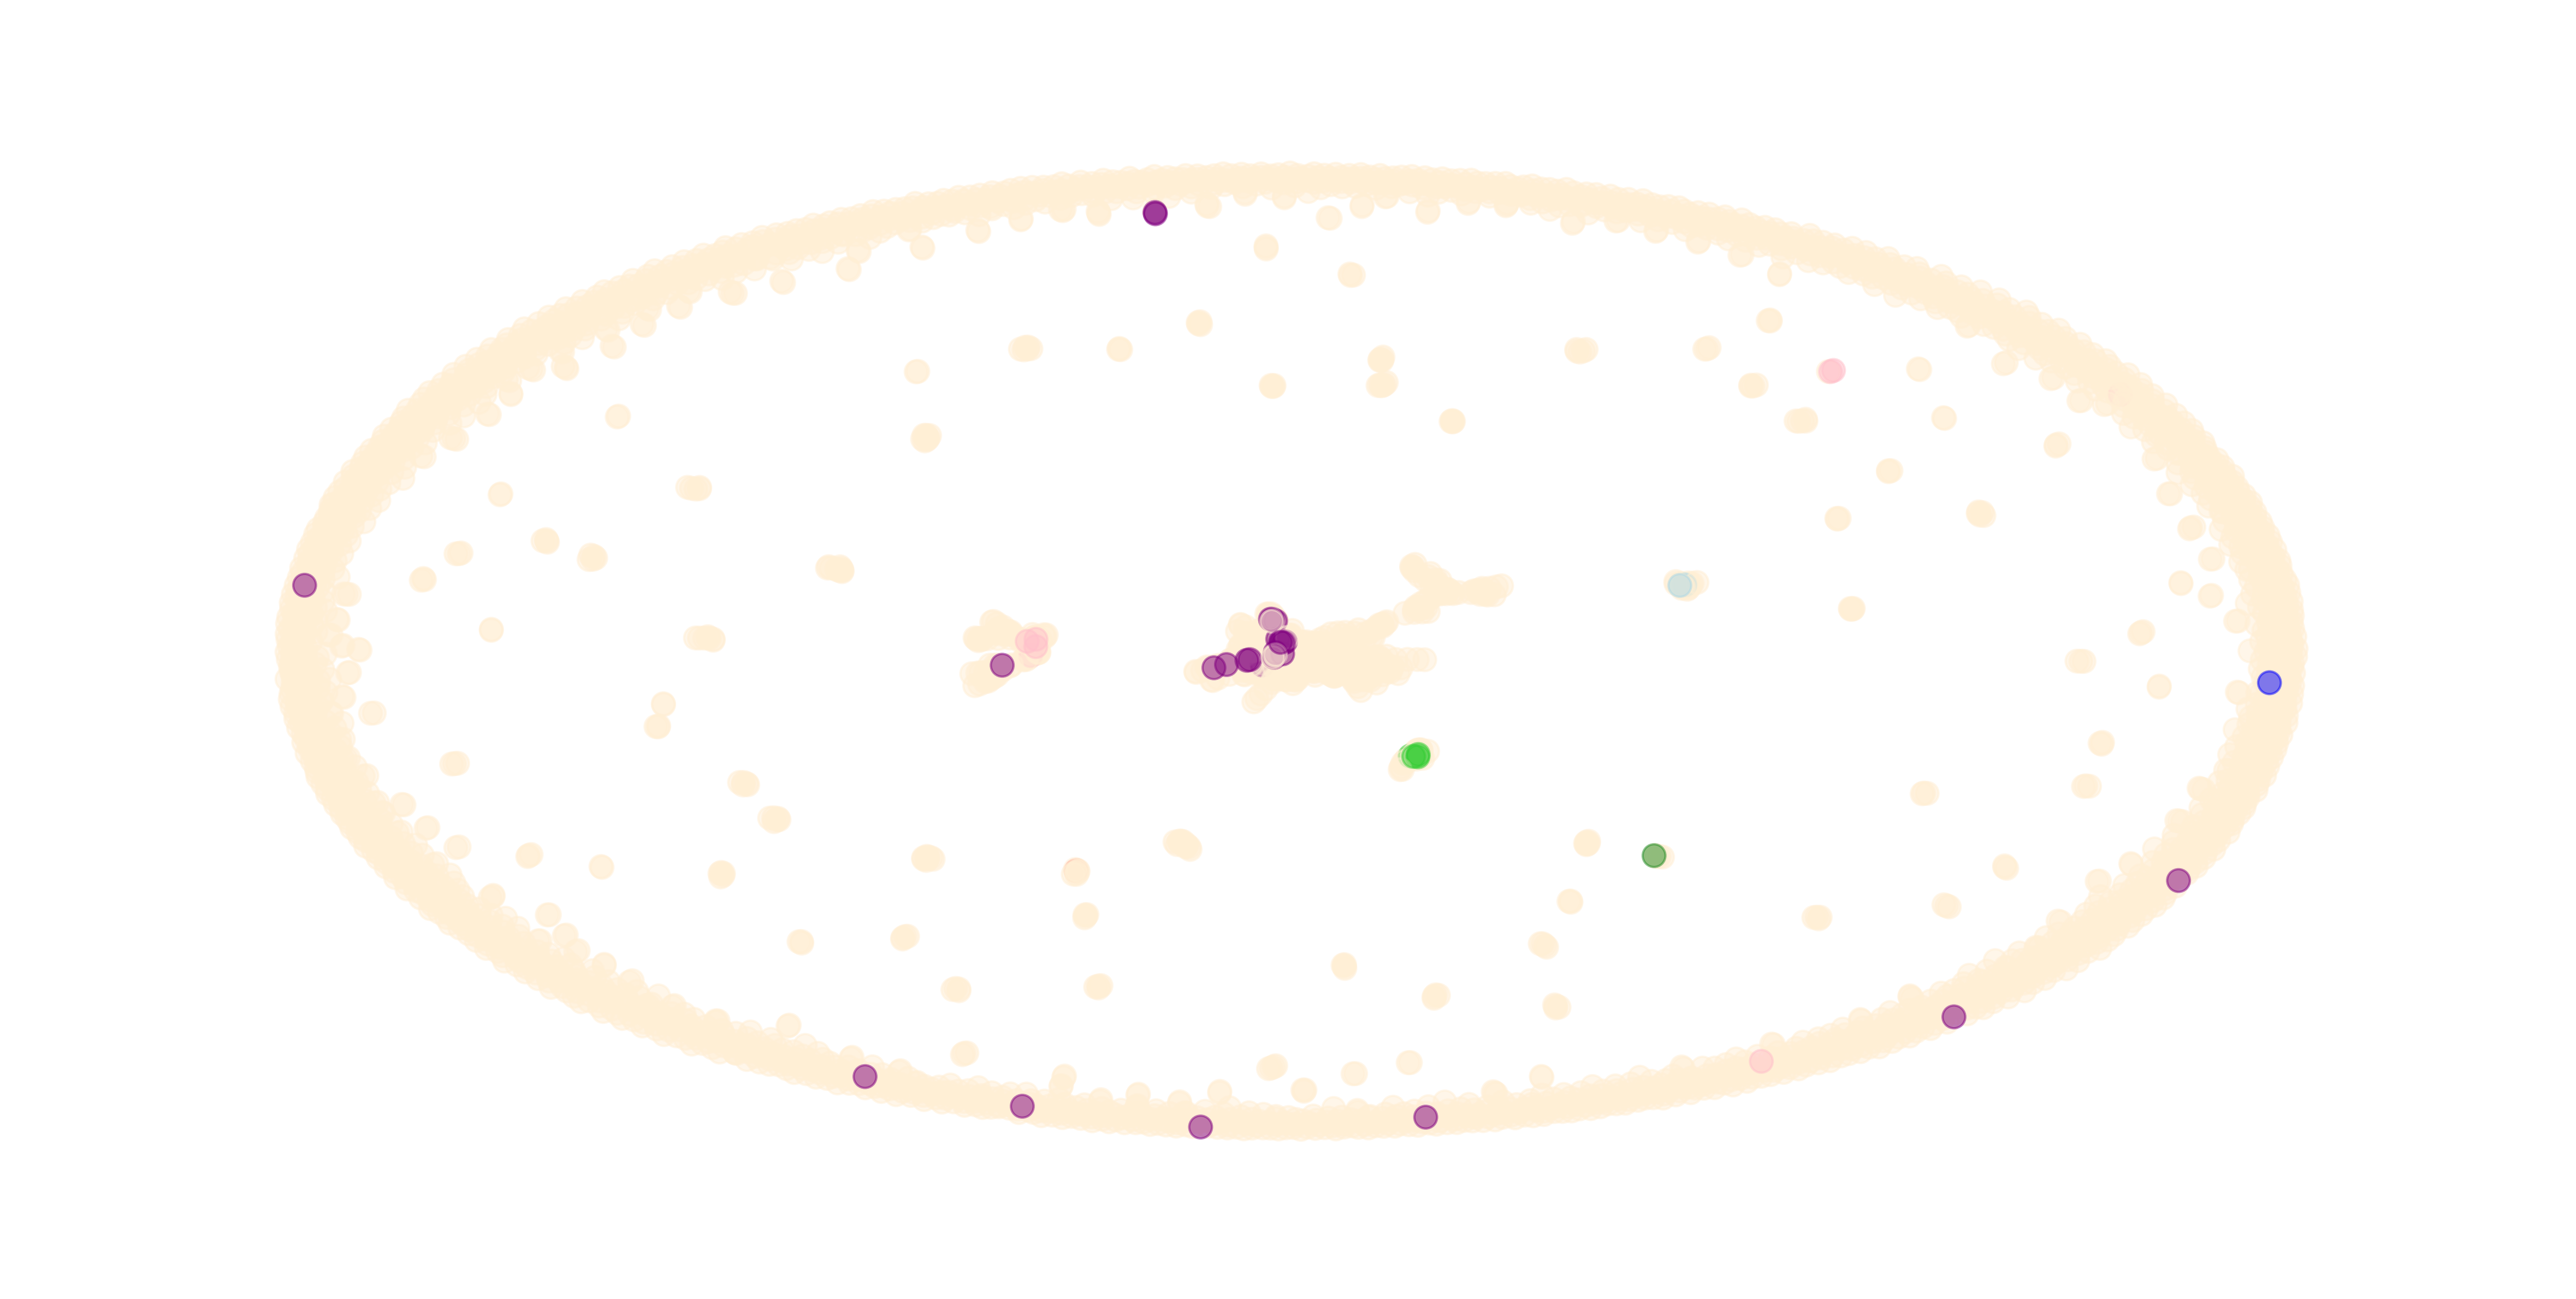

In [81]:
pos = nx.spring_layout(G, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=color_map, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='white', alpha=0.5, width=1)
plt.axis('off')

plt.show()

visualize the network with plotly (implemented in pyeed)

In [82]:
network.visualize_2d_network(color=color_map)

create networks for each family 

family_light_blue: 2 /n family_forestgreen: 1
nodes_light_blue: 0 /n nodes_forstgreen: 1


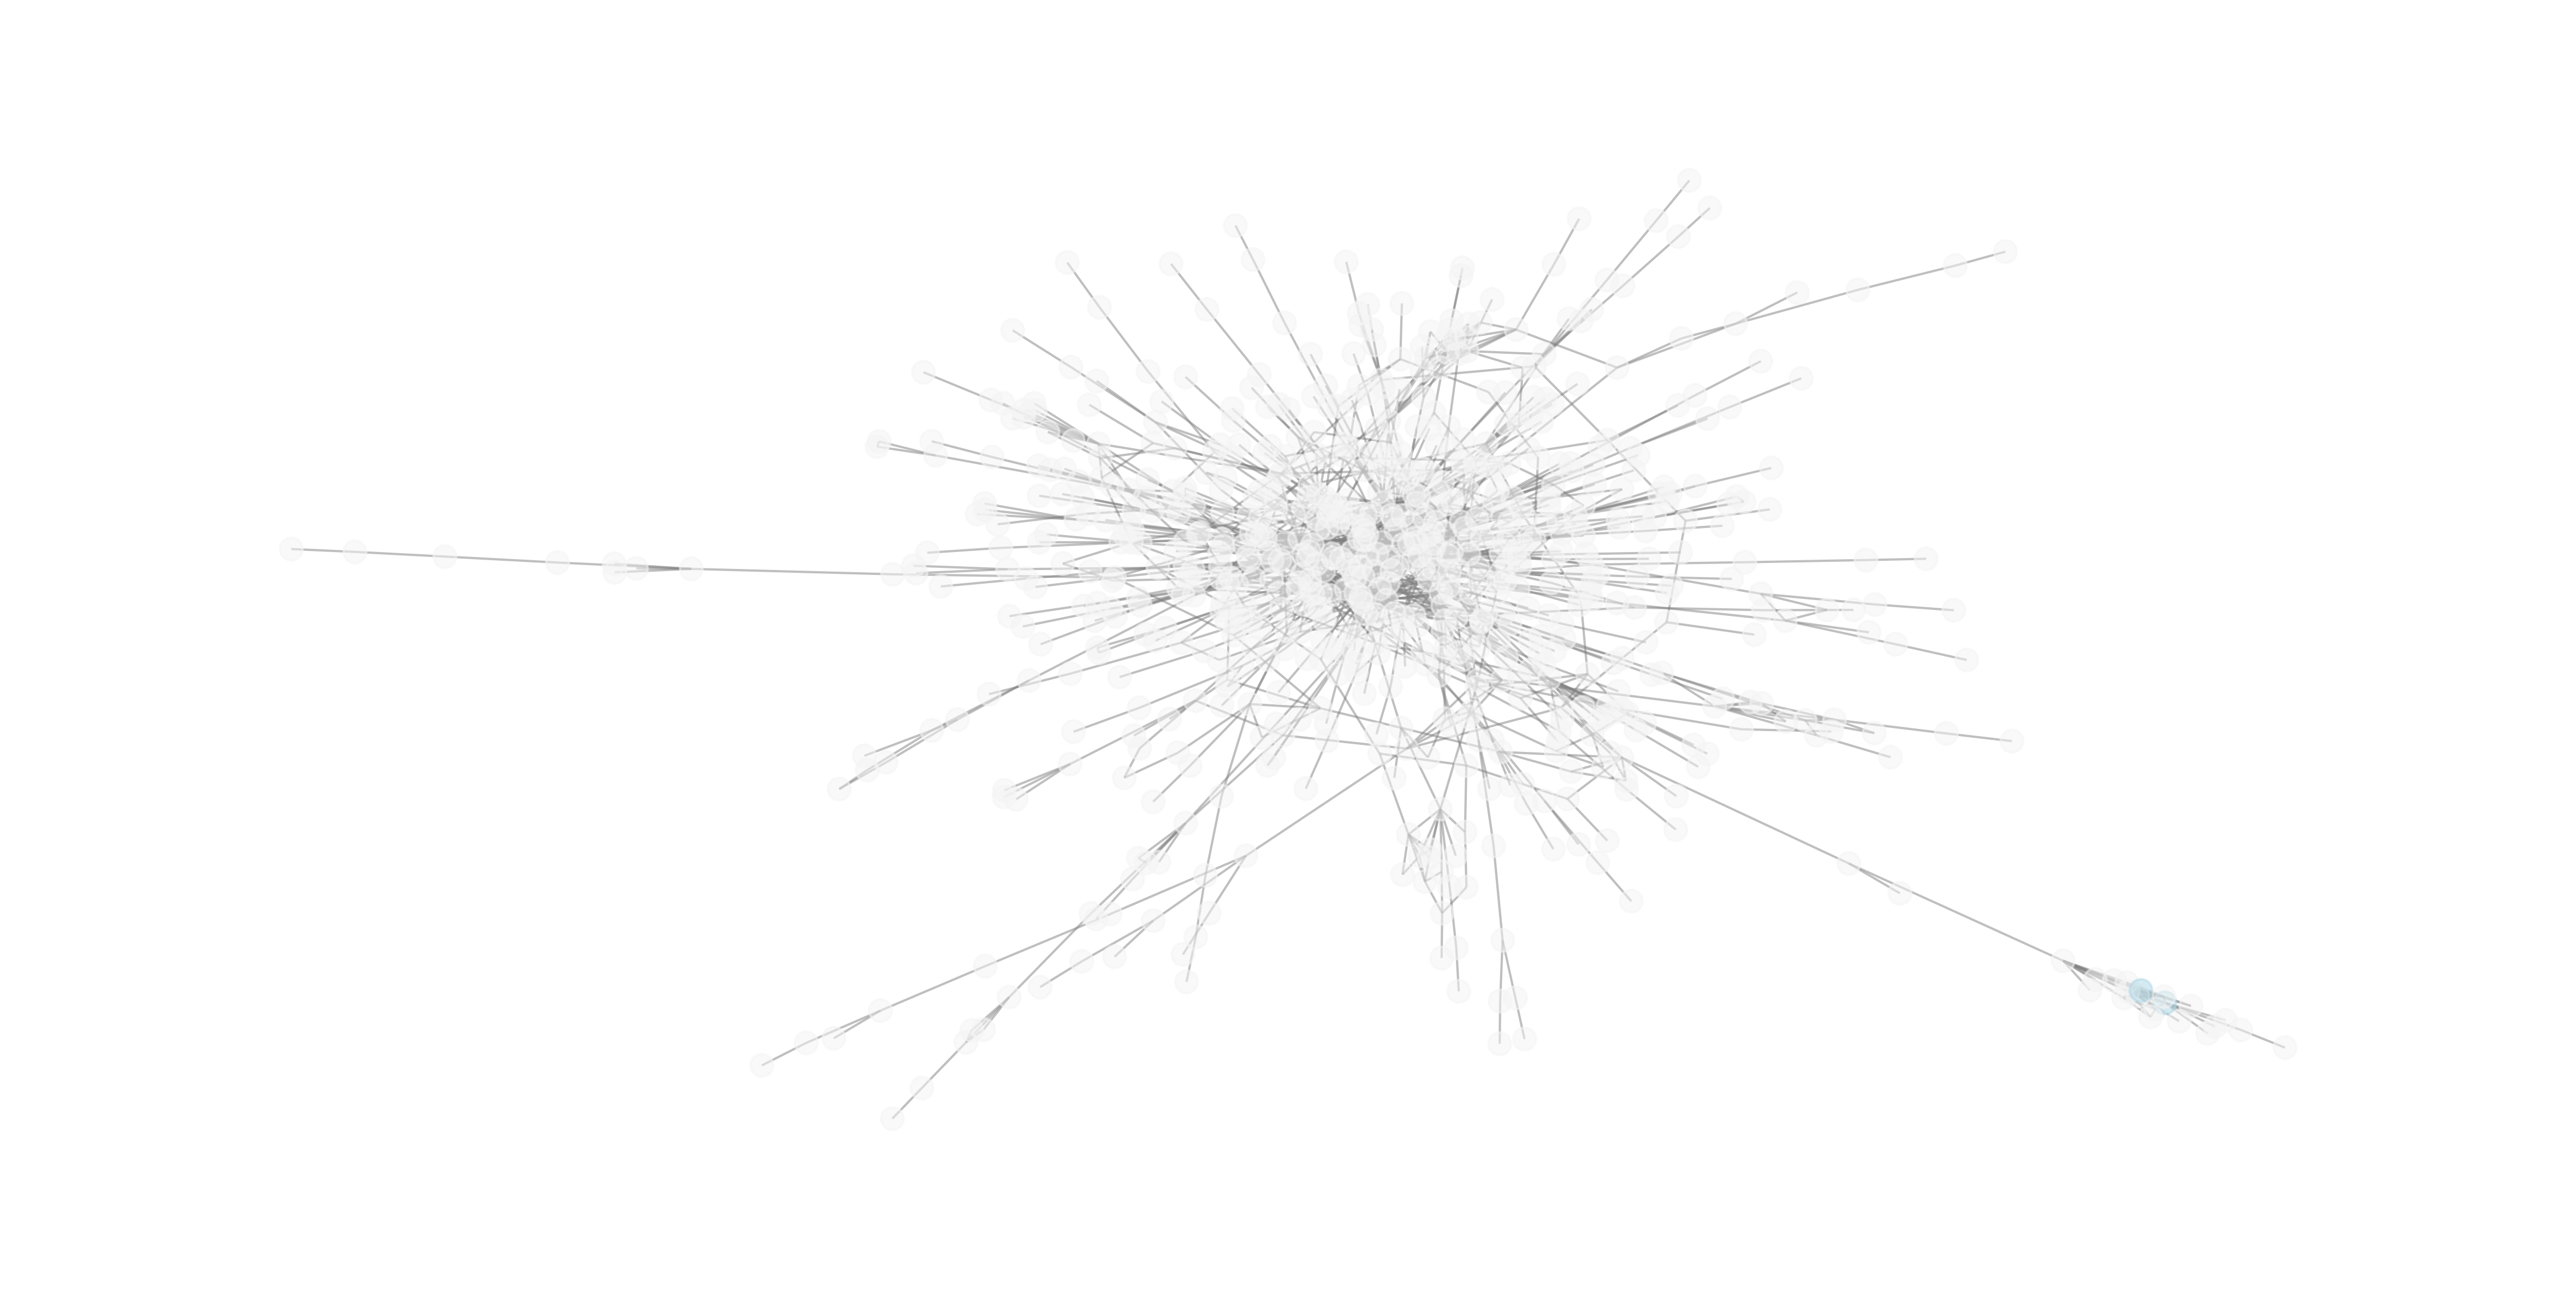

In [59]:
#light blue node AAK19606.1 
connected_nodes = nx.node_connected_component(G, "AAK19606.1" )
subgraph_light_blue = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_light_blue, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_light_blue = []
# node color varies with Degree
for v in subgraph_light_blue: 
    if v in family_1: 
        color_map_light_blue.append('limegreen')
    elif v in family_2: 
        color_map_light_blue.append('blue')
    elif v in family_3: 
        color_map_light_blue.append('lightblue')
    elif v in family_4: 
        color_map_light_blue.append('purple')
    elif v in family_5: 
        color_map_light_blue.append('pink')
    elif v in family_6: 
        color_map_light_blue.append('red')
    elif v in family_7: 
        color_map_light_blue.append('forestgreen')
    else:
        color_map_light_blue.append('whitesmoke')
    
forestgreen_no_family = []
for v in cluster_7: 
    if v not in subgraph_light_blue: 
        forestgreen_no_family.append(v)
        
light_blue_no_family = []
for v in cluster_3: 
    if v not in subgraph_light_blue: 
        light_blue_no_family.append(v)

print(f"family_light_blue: {len(cluster_3)} /n family_forestgreen: {len(cluster_7)}")
print(f"nodes_light_blue: {len(light_blue_no_family)} /n nodes_forstgreen: {len(forestgreen_no_family)}")
# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_light_blue, pos=pos, with_labels=False, node_color=color_map_light_blue, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

In [73]:
print(cluster_7)

['CAE81078.1']


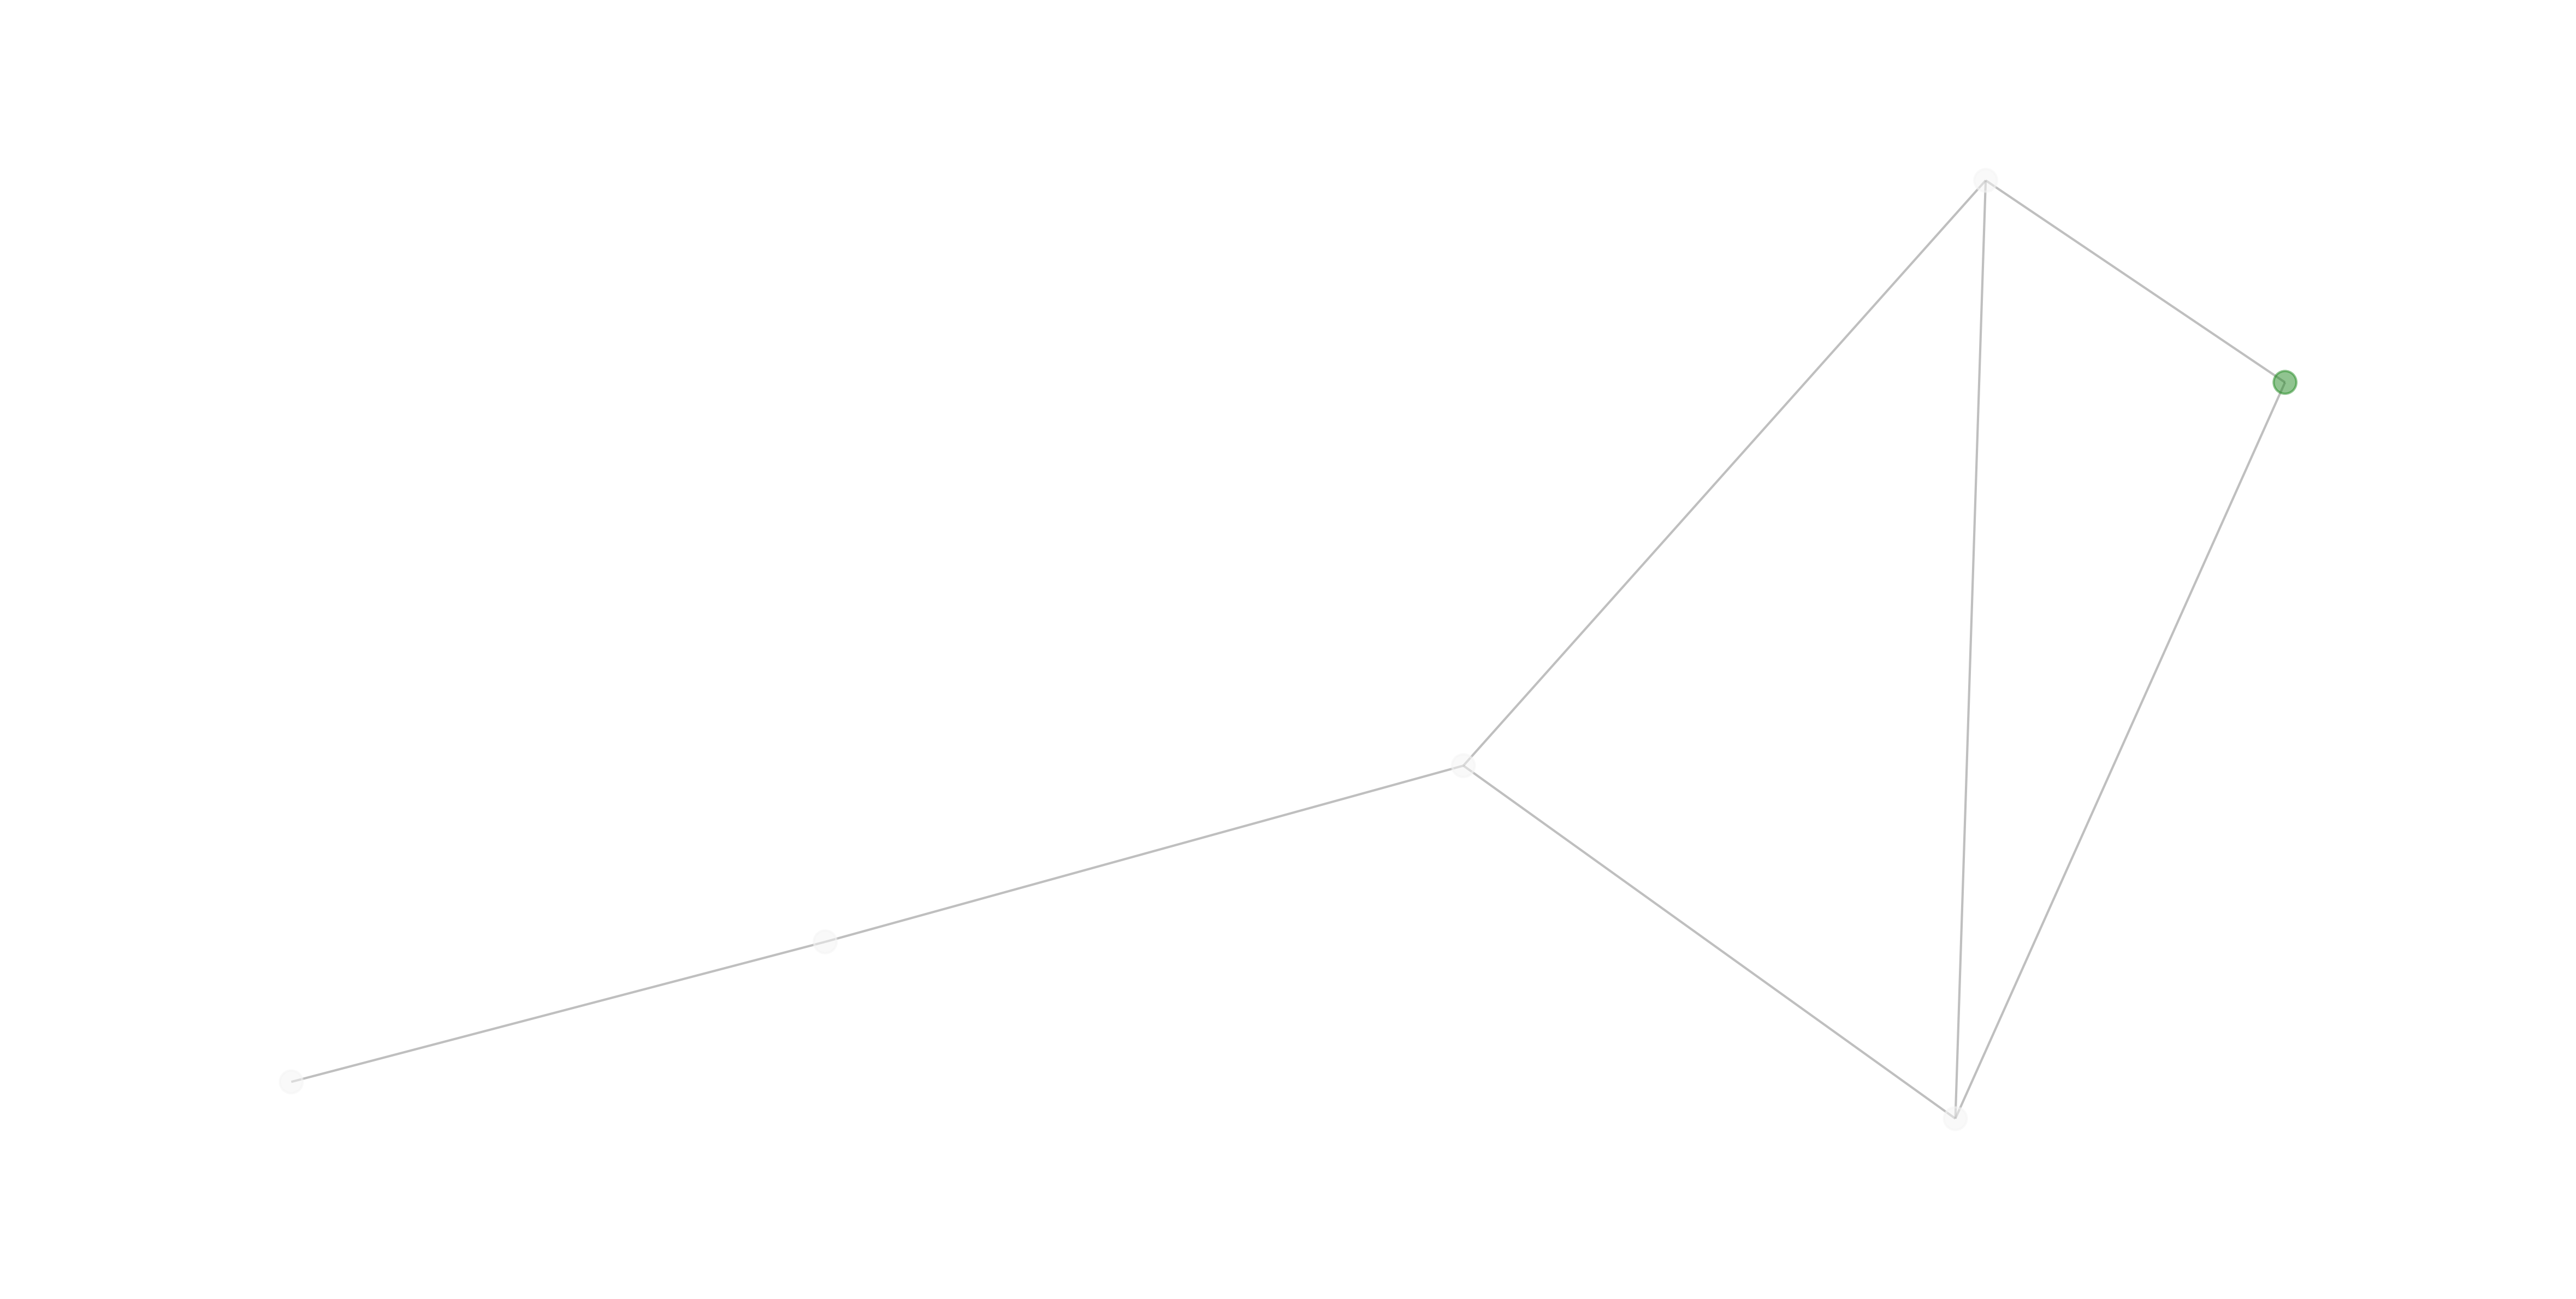

In [76]:
#forest green CAE81078.1
connected_nodes = nx.node_connected_component(G, "CAE81078.1" )
subgraph_forest_green = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_forest_green, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_forest_green = []
# node color varies with Degree
for v in subgraph_forest_green: 
    if v in family_1: 
        color_map_forest_green.append('limegreen')
    elif v in family_2: 
        color_map_forest_green.append('blue')
    elif v in family_3: 
        color_map_forest_green.append('lightblue')
    elif v in family_4: 
        color_map_forest_green.append('purple')
    elif v in family_5: 
        color_map_forest_green.append('pink')
    elif v in family_6: 
        color_map_forest_green.append('red')
    elif v in family_7: 
        color_map_forest_green.append('forestgreen')
    else:
        color_map_forest_green.append('whitesmoke')

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_forest_green, pos=pos, with_labels=False, node_color=color_map_forest_green, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

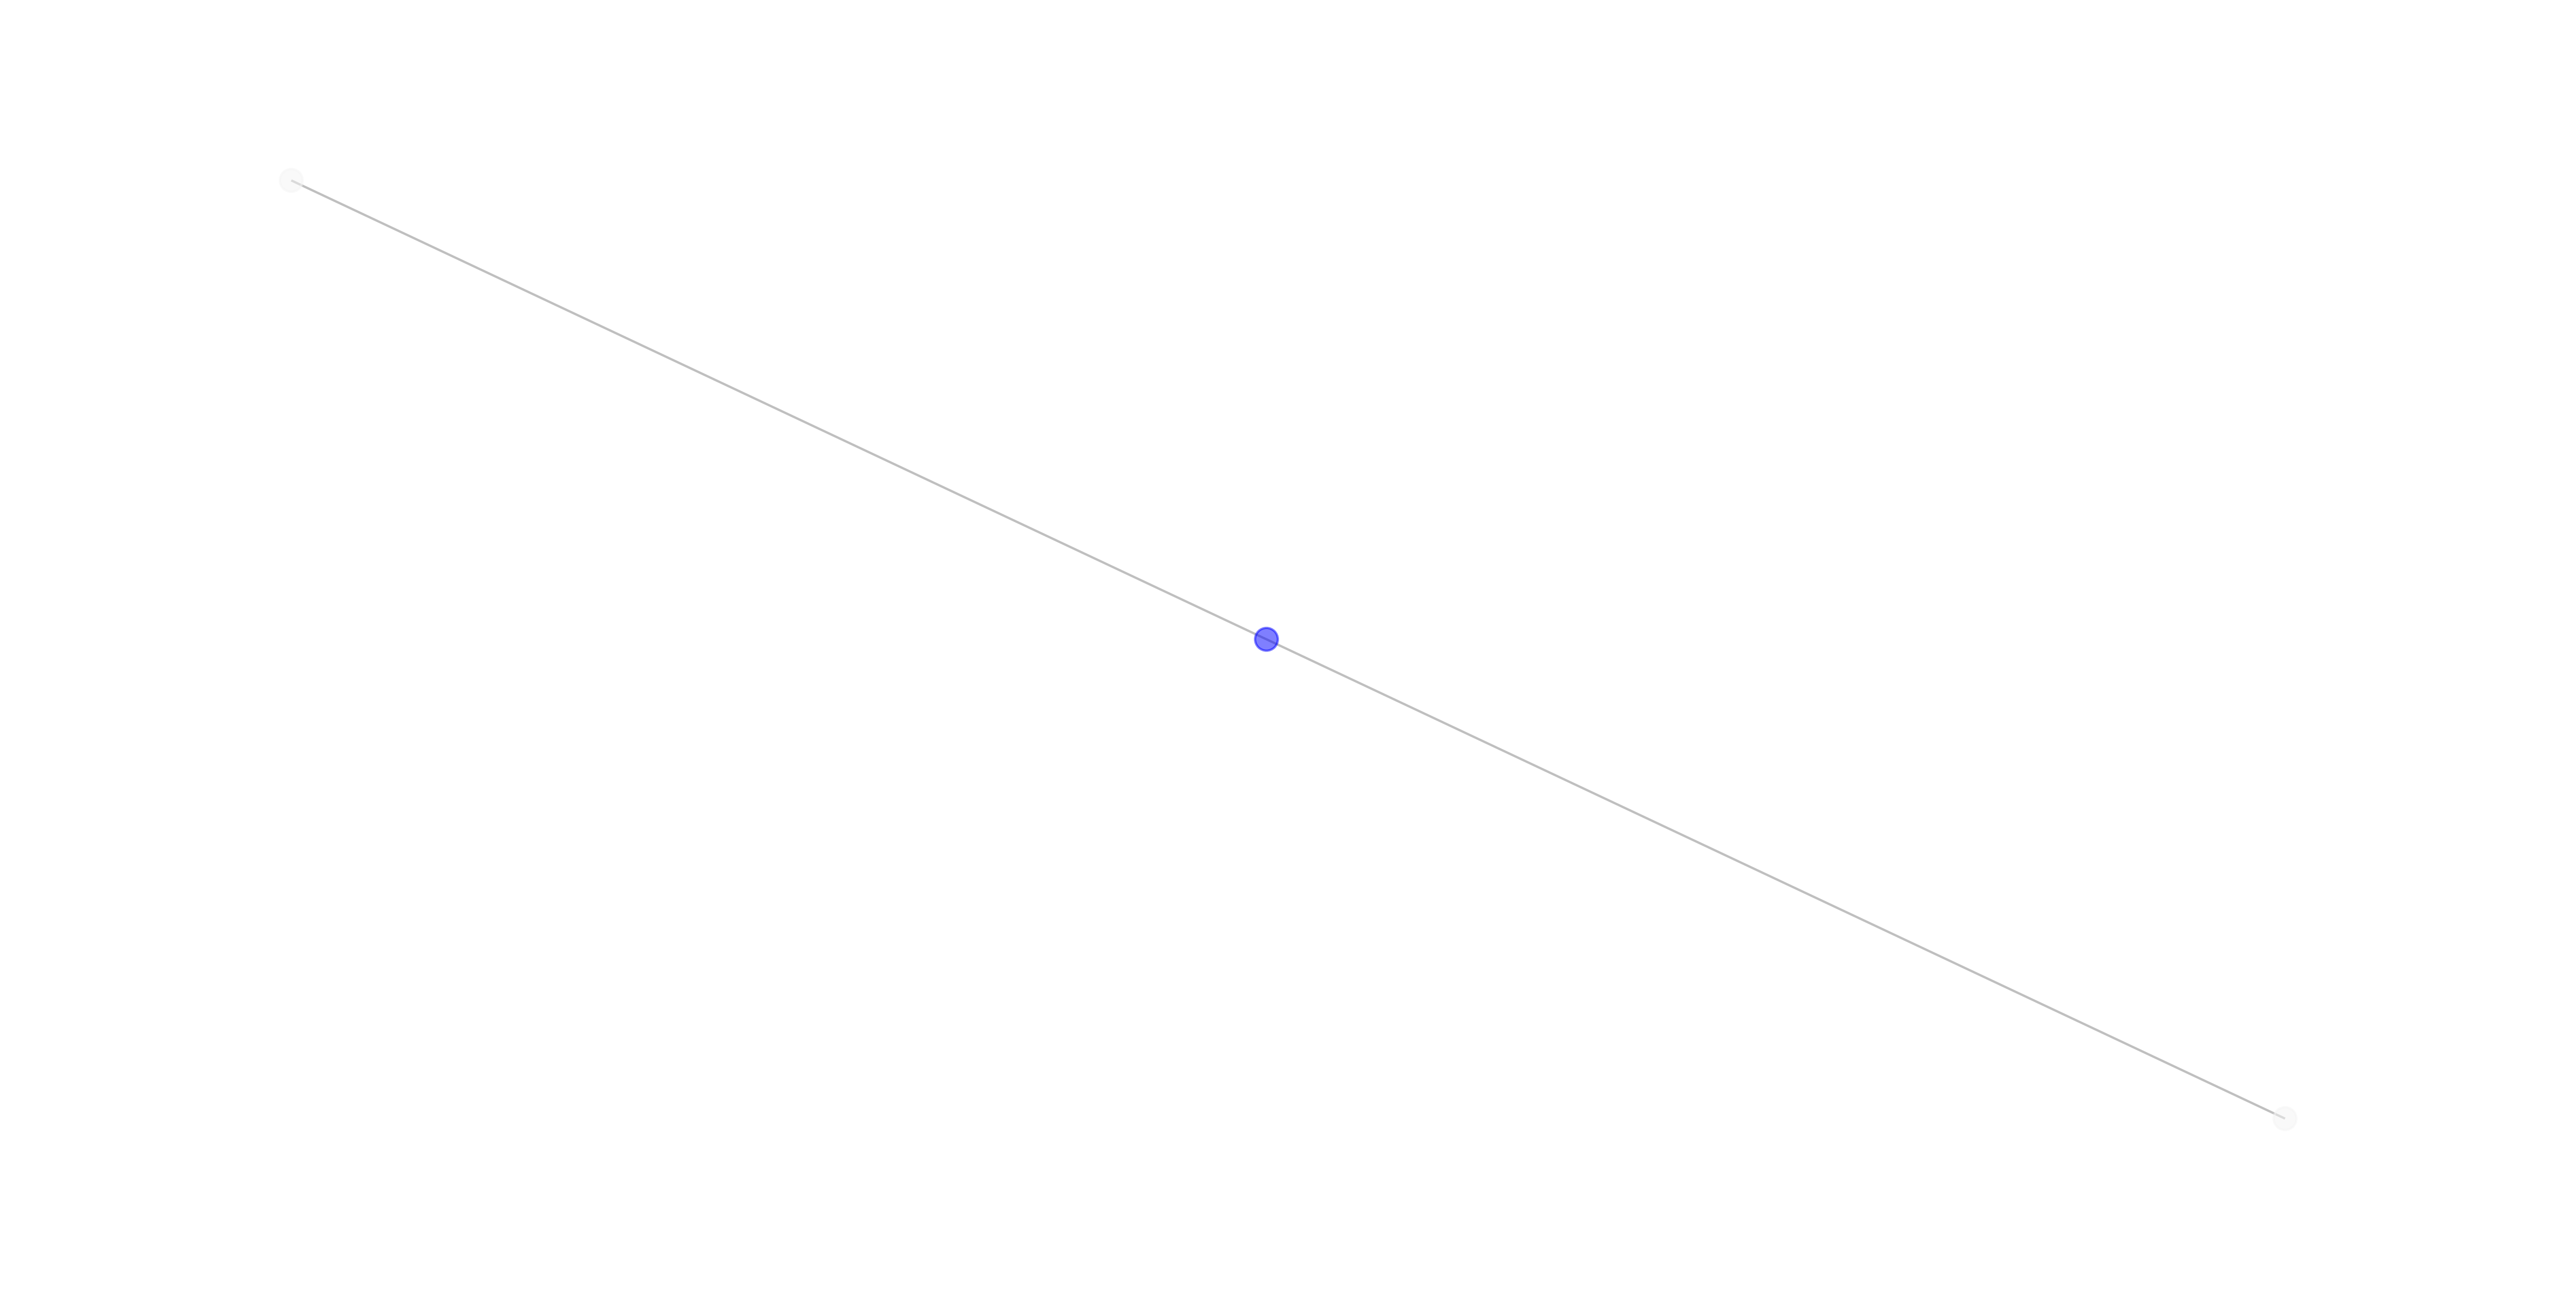

In [60]:
#dark blue node ABX81126.1
connected_nodes = nx.node_connected_component(G, "ABX81126.1" )
subgraph_dark_blue = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_dark_blue, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_dark_blue = []
# node color varies with Degree
for v in subgraph_dark_blue: 
    if v in family_1: 
        color_map_dark_blue.append('limegreen')
    elif v in family_2: 
        color_map_dark_blue.append('blue')
    elif v in family_3: 
        color_map_dark_blue.append('lightblue')
    elif v in family_4: 
        color_map_dark_blue.append('purple')
    elif v in family_5: 
        color_map_dark_blue.append('pink')
    elif v in family_6: 
        color_map_dark_blue.append('red')
    elif v in family_7: 
        color_map_dark_blue.append('forestgreen')
    else:
        color_map_dark_blue.append('whitesmoke')

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_dark_blue, pos=pos, with_labels=False, node_color=color_map_dark_blue, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

In [61]:
dark_blue_no_family = []
for v in cluster_2: 
    if v not in subgraph_dark_blue: 
        dark_blue_no_family.append(v)
        

print(f"family_dark_blue: {len(cluster_2)}")
print(f"nodes_dark_blue: {len(dark_blue_no_family)}")
# Draw the nodes

family_dark_blue: 1
nodes_dark_blue: 0


In [62]:
print(cluster_6)

['AAK07742.1']


Red: 0 and []
1


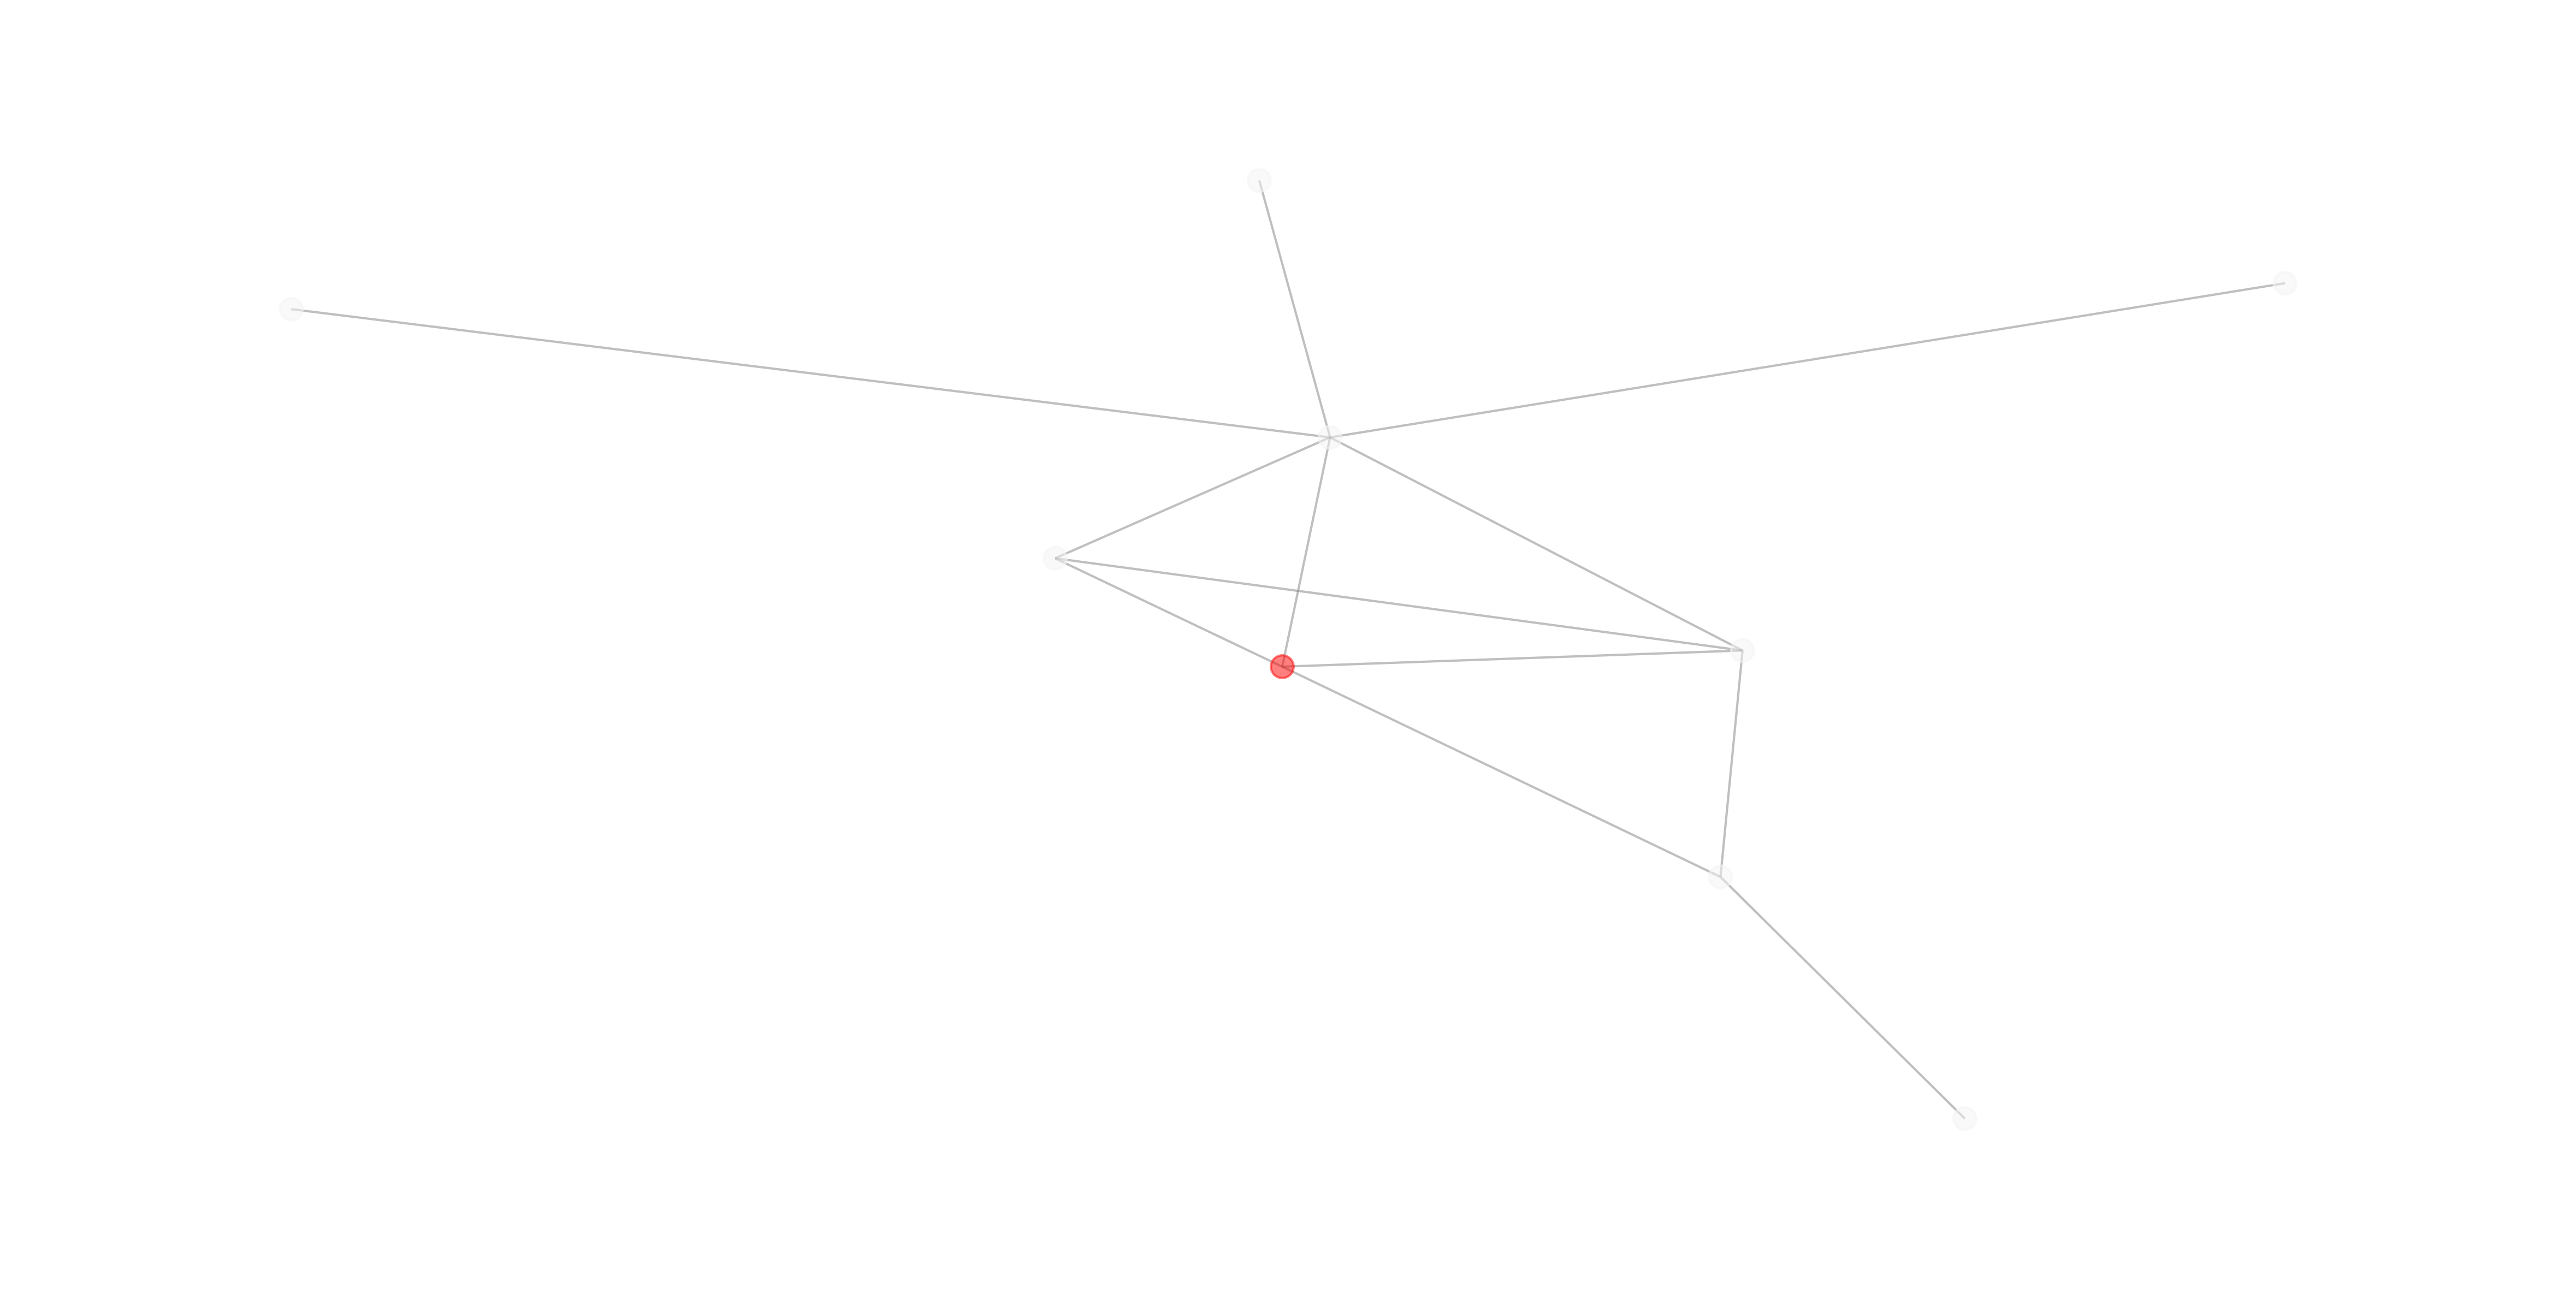

In [63]:
#purple node AAK07742.1'
connected_nodes = nx.node_connected_component(G, "AAK07742.1" )
subgraph_red = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_red, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_red = []
# node color varies with Degree
for v in subgraph_red: 
    if v in family_1: 
        color_map_red.append('limegreen')
    elif v in family_2: 
        color_map_red.append('blue')
    elif v in family_3: 
        color_map_red.append('lightblue')
    elif v in family_4: 
        color_map_red.append('purple')
    elif v in family_5: 
        color_map_red.append('pink')
    elif v in family_6: 
        color_map_red.append('red')
    elif v in family_7: 
        color_map_red.append('forestgreen')
    else:
        color_map_red.append('whitesmoke')

red_no_family = []
for v in cluster_6: 
    if v not in subgraph_red: 
        red_no_family.append(v)
        
pink_no_family = []
for v in cluster_5: 
    if v not in subgraph_red: 
        pink_no_family.append(v)

print(f"Red: {len(red_no_family)} and {red_no_family}")
print(len(cluster_6))

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_red, pos=pos, with_labels=False, node_color=color_map_red, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

In [64]:
print(cluster_1)

['EDM33228.1', 'ABQ67013.1', 'EAT06904.1', 'AAA72003.1']


Lime green: 0 and []
4


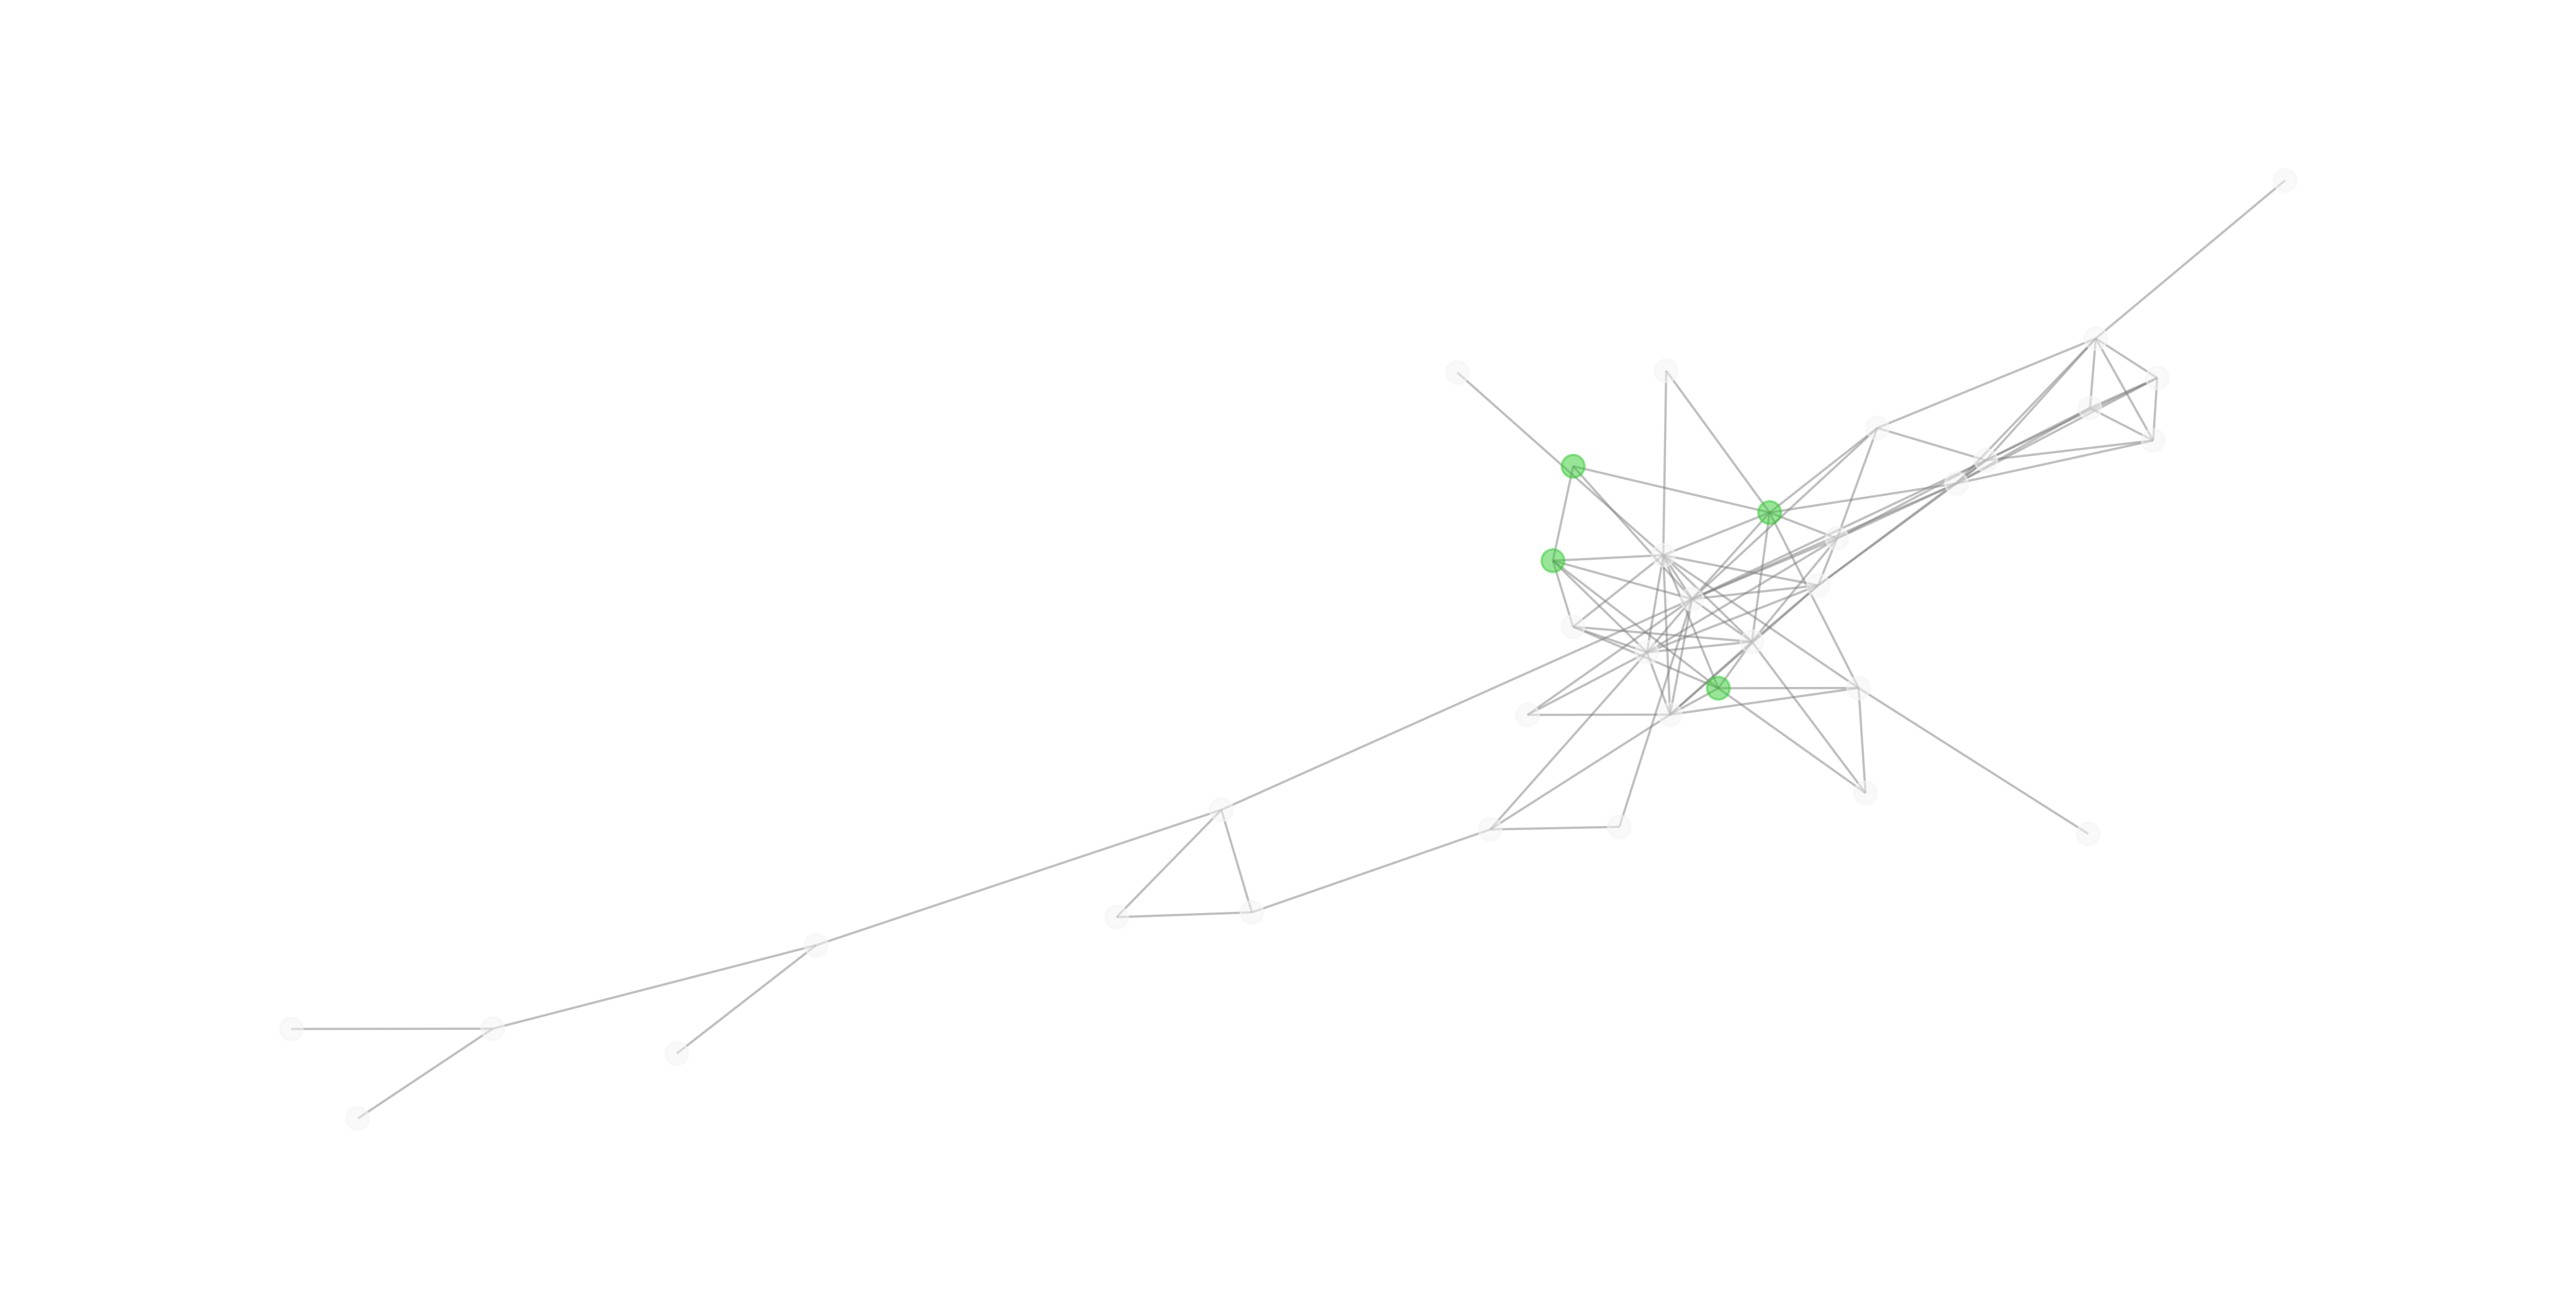

In [65]:
#lime_green node EDM33228.1
connected_nodes = nx.node_connected_component(G, "EDM33228.1" )
subgraph_lime_green = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_lime_green, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_lime_green = []
# node color varies with Degree
for v in subgraph_lime_green: 
    if v in family_1: 
        color_map_lime_green.append('limegreen')
    elif v in family_2: 
        color_map_lime_green.append('blue')
    elif v in family_3: 
        color_map_lime_green.append('lightblue')
    elif v in family_4: 
        color_map_lime_green.append('purple')
    elif v in family_5: 
        color_map_lime_green.append('pink')
    elif v in family_6: 
        color_map_lime_green.append('red')
    elif v in family_7: 
        color_map_lime_green.append('forestgreen')
    else:
        color_map_lime_green.append('whitesmoke')

lime_green_no_family = []
for v in cluster_1: 
    if v not in subgraph_lime_green: 
        lime_green_no_family.append(v)
        

print(f"Lime green: {len(lime_green_no_family)} and {lime_green_no_family}")
print(len(cluster_1))

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_lime_green, pos=pos, with_labels=False, node_color=color_map_lime_green, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

Purple: ['CAN94347.1', 'ABF91899.1', 'ABG59664.1', 'ABN91764.1', 'CAN96908.1', 'ABZ94905.1', 'BAC89792.1', 'EAK85441.1', 'ACC80036.1', 'CAE08072.1']
Pink: ['ABM40181.1', 'BAA92354.1', 'EDQ42935.1', 'ABM35452.1', 'EAS03280.1', 'ABC28834.1', 'EAL65228.1', 'EAU98424.1']
27
8


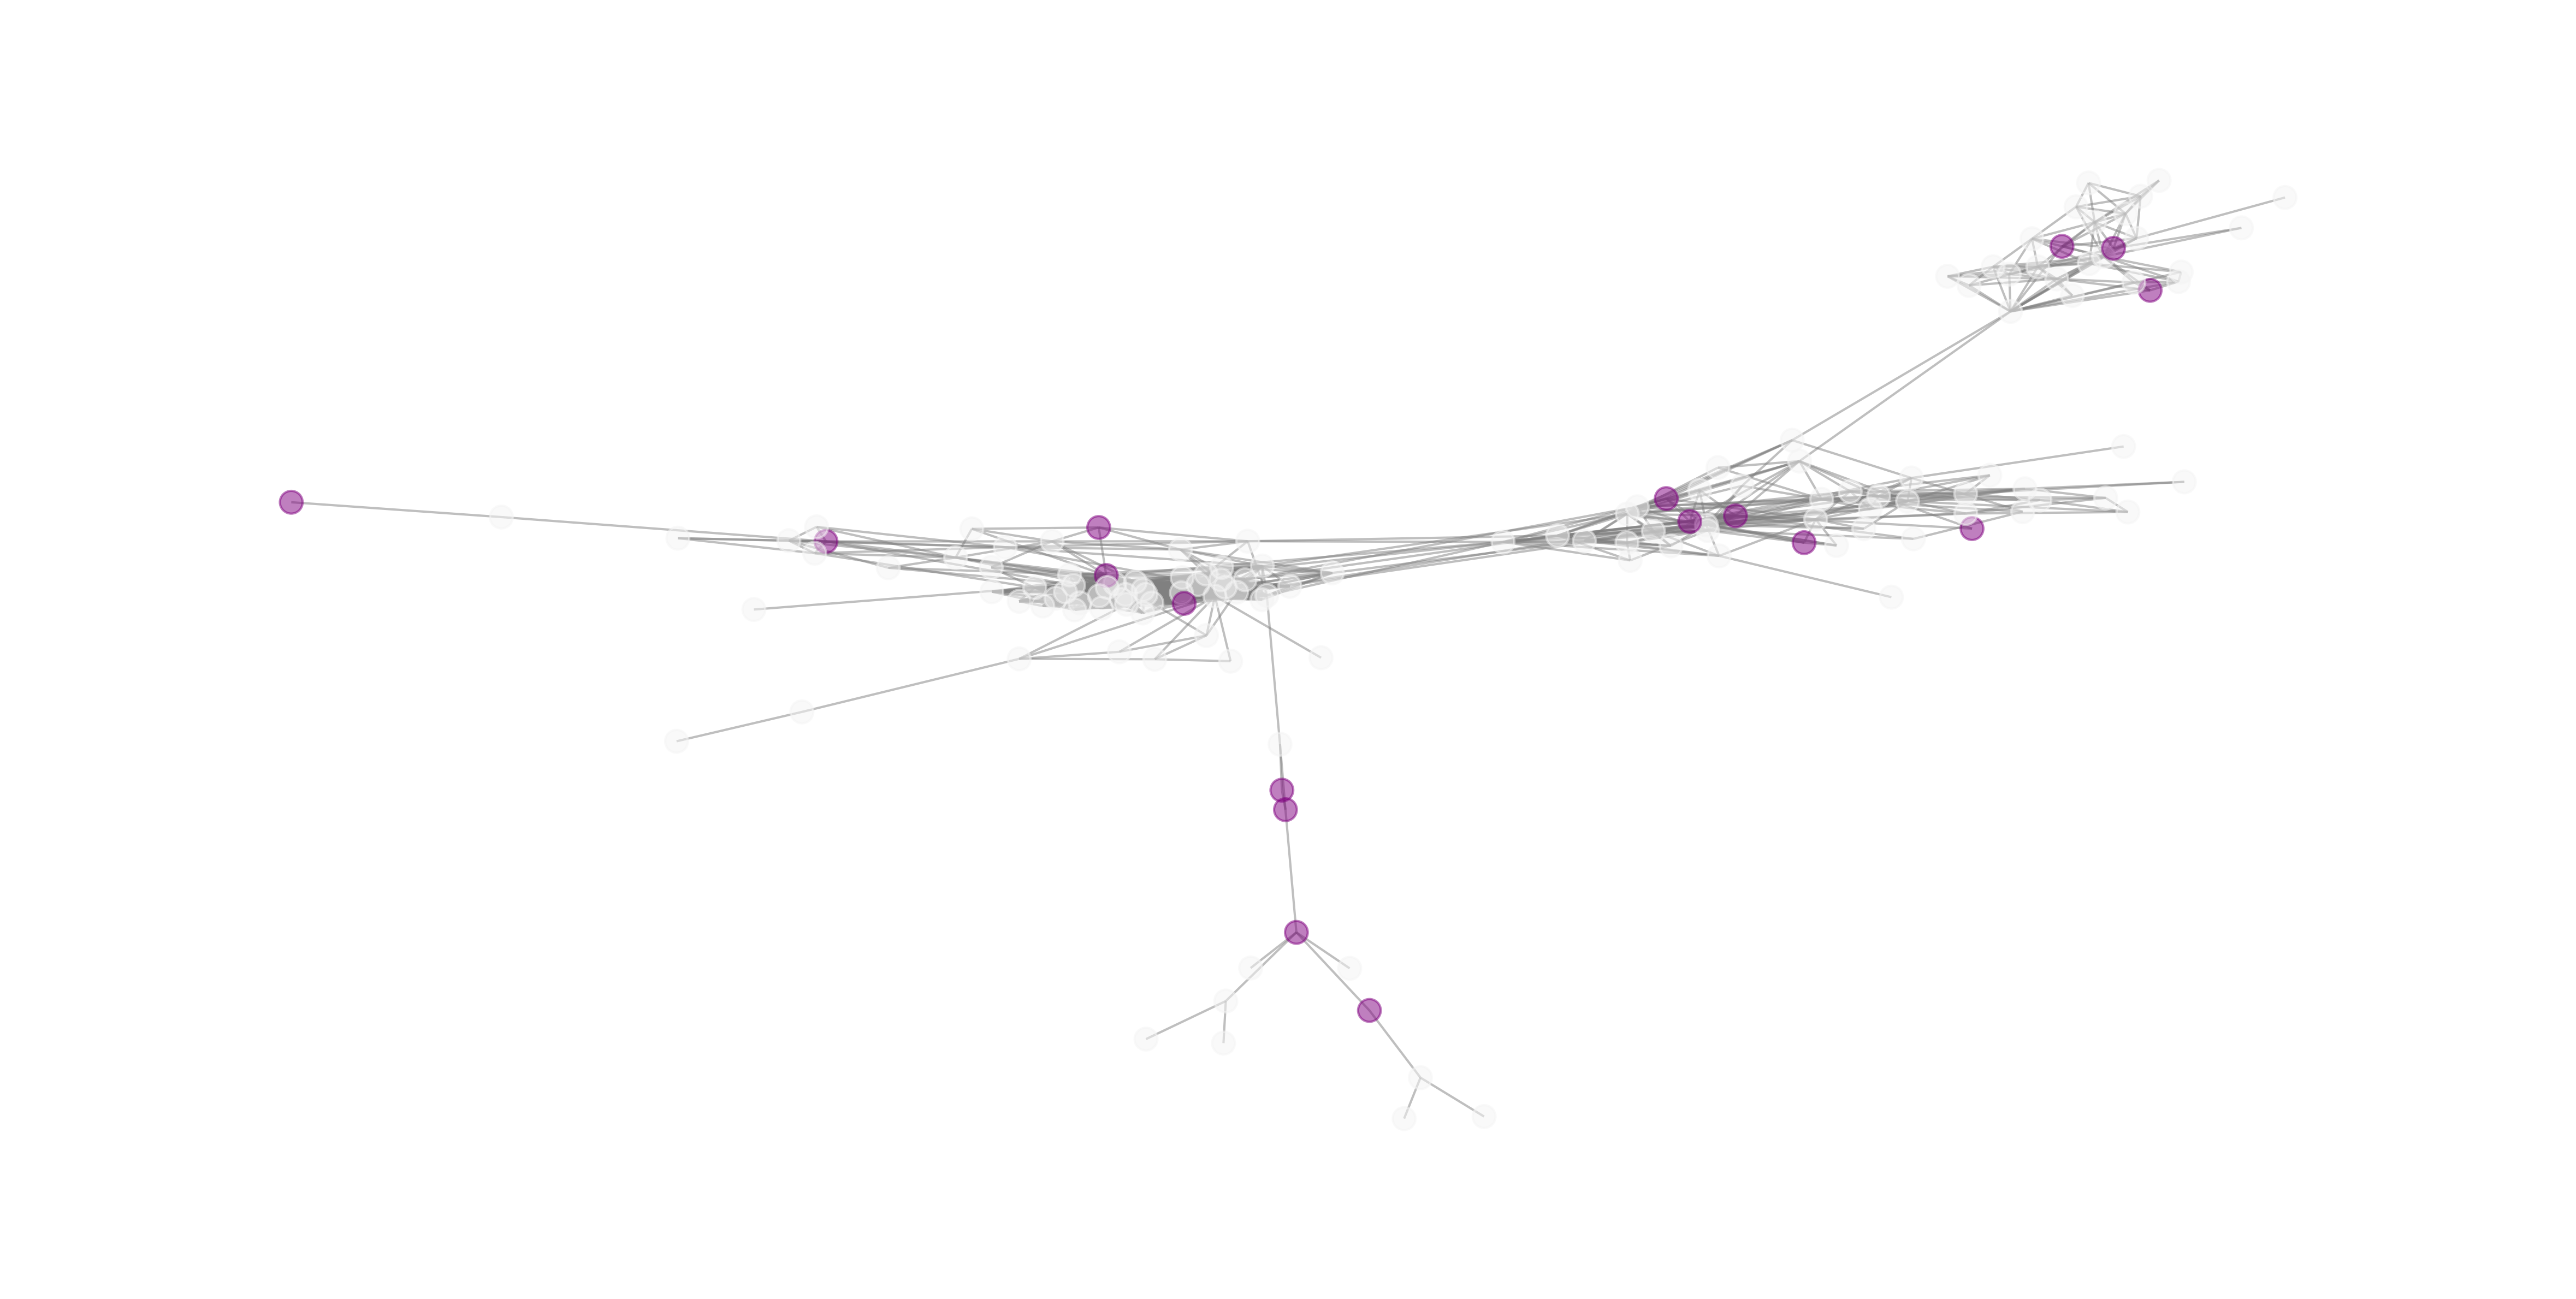

In [83]:
#purple node EAU46214.1
connected_nodes = nx.node_connected_component(G, "EAU46214.1" )
subgraph_purple_2 = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_purple_2, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_purpule = []
# node color varies with Degree
for v in subgraph_purple_2: 
    if v in family_1: 
        color_map_purpule.append('limegreen')
    elif v in family_2: 
        color_map_purpule.append('blue')
    elif v in family_3: 
        color_map_purpule.append('lightblue')
    elif v in family_4: 
        color_map_purpule.append('purple')
    elif v in family_5: 
        color_map_purpule.append('pink')
    elif v in family_6: 
        color_map_purpule.append('red')
    elif v in family_7: 
        color_map_purpule.append('forestgreen')
    else:
        color_map_purpule.append('whitesmoke')

purple_no_family = []
for v in cluster_4: 
    if v not in subgraph_purple_2: 
        purple_no_family.append(v)

pink_no_family = []
for v in cluster_5: 
    if v not in subgraph_purple_2: 
        pink_no_family.append(v)

print(f"Purple: {purple_no_family}")
print(f"Pink: {pink_no_family}")
print(len(cluster_4))
print(len(cluster_5))

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_purple_2, pos=pos, with_labels=False, node_color=color_map_purpule, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

Purple: ['ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'ABG59664.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'EAQ05513.1', 'CAL74448.1', 'CAN96908.1', 'ABZ73421.1', 'ABZ94905.1', 'EAU66227.1', 'EDS56387.1', 'BAC89792.1', 'EAK85441.1', 'ACC80036.1', 'CAE08072.1', 'EDJ94736.1', 'ABD13806.1', 'ABQ28771.1', 'ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'ABG59664.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'ABN91764.1', 'EAQ05513.1', 'CAL74448.1', 'CAN96908.1', 'ABZ73421.1', 'ABZ94905.1', 'EAU66227.1', 'EDS56387.1', 'BAC89792.1', 'EAK85441.1', 'ACC80036.1', 'CAE08072.1', 'EDJ94736.1', 'ABD13806.1', 'ABQ28771.1', 'ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'ABG59664.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'EAQ05513.1', 'CAL74448.1', 'CAN96908.1', 'ABZ73421.1', 'ABZ94905.1', 'EAU66227.1

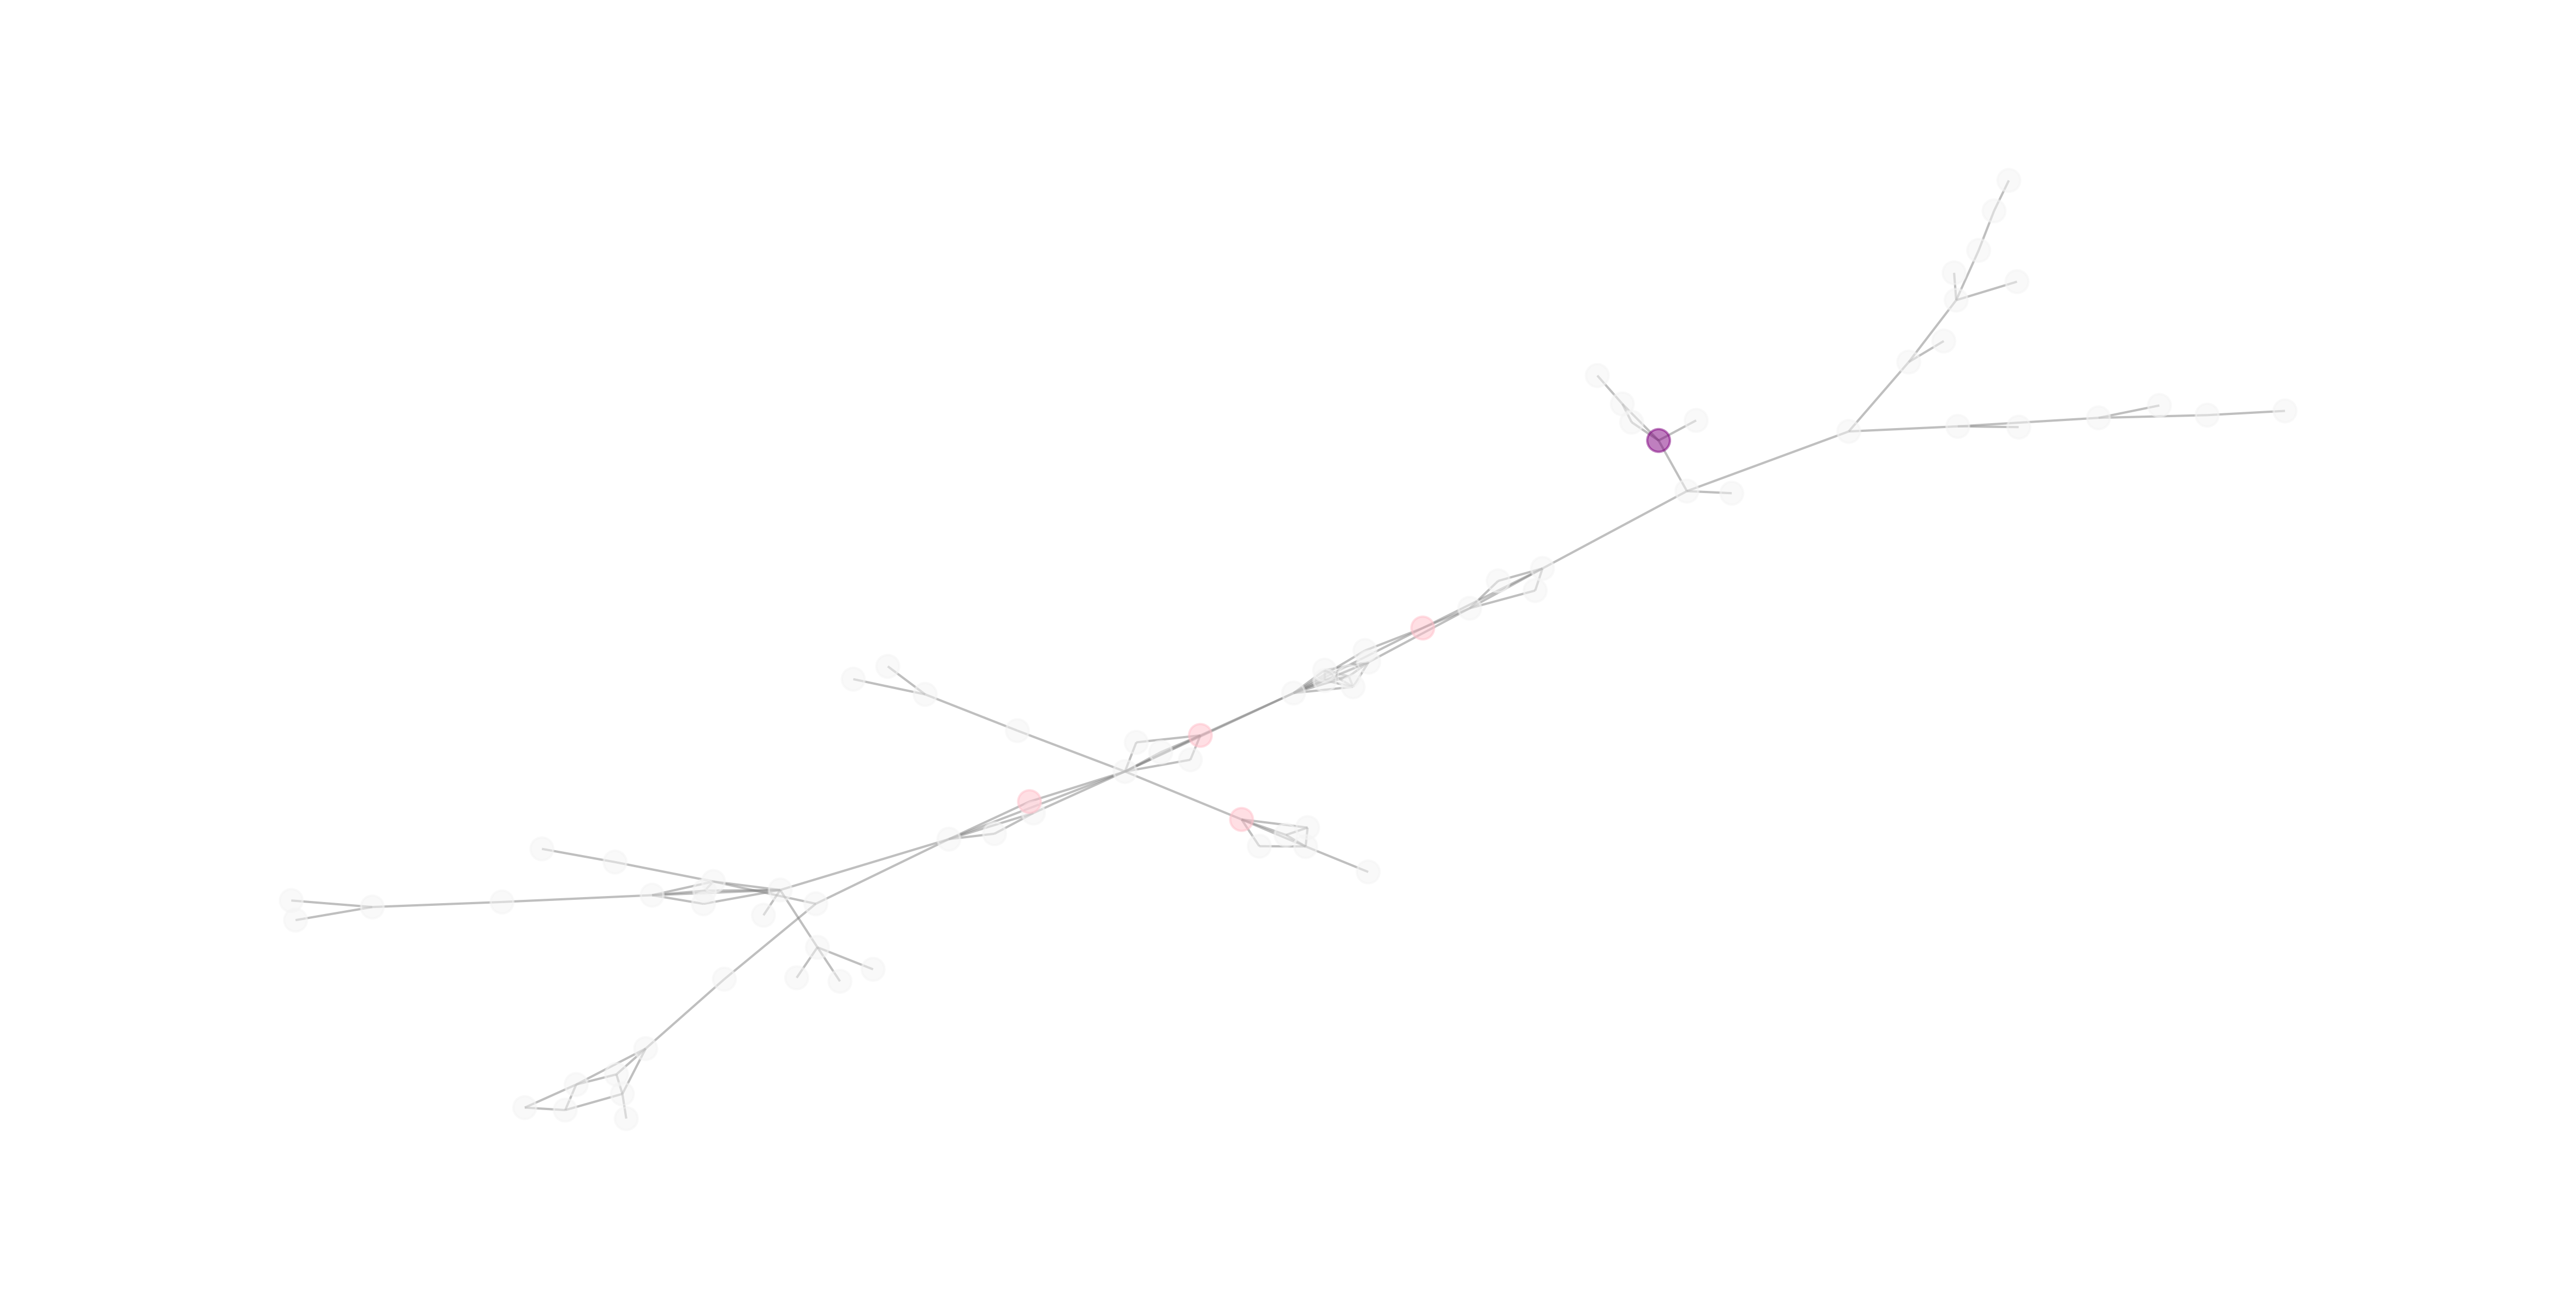

In [87]:
#purple node ABM40181.1
connected_nodes = nx.node_connected_component(G, "EAL65228.1" )
subgraph_pink = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_pink, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_pink = []
# node color varies with Degree
for v in subgraph_pink: 
    if v in family_1: 
        color_map_pink.append('limegreen')
    elif v in family_2: 
        color_map_pink.append('blue')
    elif v in family_3: 
        color_map_pink.append('lightblue')
    elif v in family_4: 
        color_map_pink.append('purple')
    elif v in family_5: 
        color_map_pink.append('pink')
    elif v in family_6: 
        color_map_pink.append('red')
    elif v in family_7: 
        color_map_pink.append('forestgreen')
    else:
        color_map_pink.append('whitesmoke')

#purple_no_family = []
for v in cluster_4: 
    if v not in subgraph_pink: 
        purple_no_family.append(v)

#pink_no_family = []
for v in cluster_5: 
    if v not in subgraph_pink: 
        pink_no_family.append(v)

print(f"Purple: {purple_no_family}")
print(f"Pink: {pink_no_family}")
print(len(cluster_4))
print(len(cluster_5))

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_pink, pos=pos, with_labels=False, node_color=color_map_pink, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

Purple: ['ABG59664.1', 'ABZ94905.1', 'BAC89792.1', 'ACC80036.1', 'CAE08072.1', 'ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'ABN91764.1', 'EAQ05513.1', 'CAL74448.1', 'CAN96908.1', 'ABZ73421.1', 'ABZ94905.1', 'EAU66227.1', 'EDS56387.1', 'BAC89792.1', 'EAK85441.1', 'ACC80036.1', 'CAE08072.1', 'EDJ94736.1', 'ABD13806.1', 'ABQ28771.1', 'ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'ABN91764.1', 'EAQ05513.1', 'CAL74448.1', 'CAN96908.1', 'ABZ73421.1', 'ABZ94905.1', 'EAU66227.1', 'EDS56387.1', 'BAC89792.1', 'EAK85441.1', 'ACC80036.1', 'CAE08072.1', 'EDJ94736.1', 'ABD13806.1', 'ABQ28771.1', 'ABL72678.1', 'ABM37250.1', 'CAN94347.1', 'ABF91899.1', 'ACC73521.1', 'ABK70931.1', 'ABM34568.1', 'ABG59664.1', 'EAT91929.1', 'EAU46214.1', 'EAU81722.1', 'ABL03397.1', 'ABN91764.1', 'EAQ05513.1

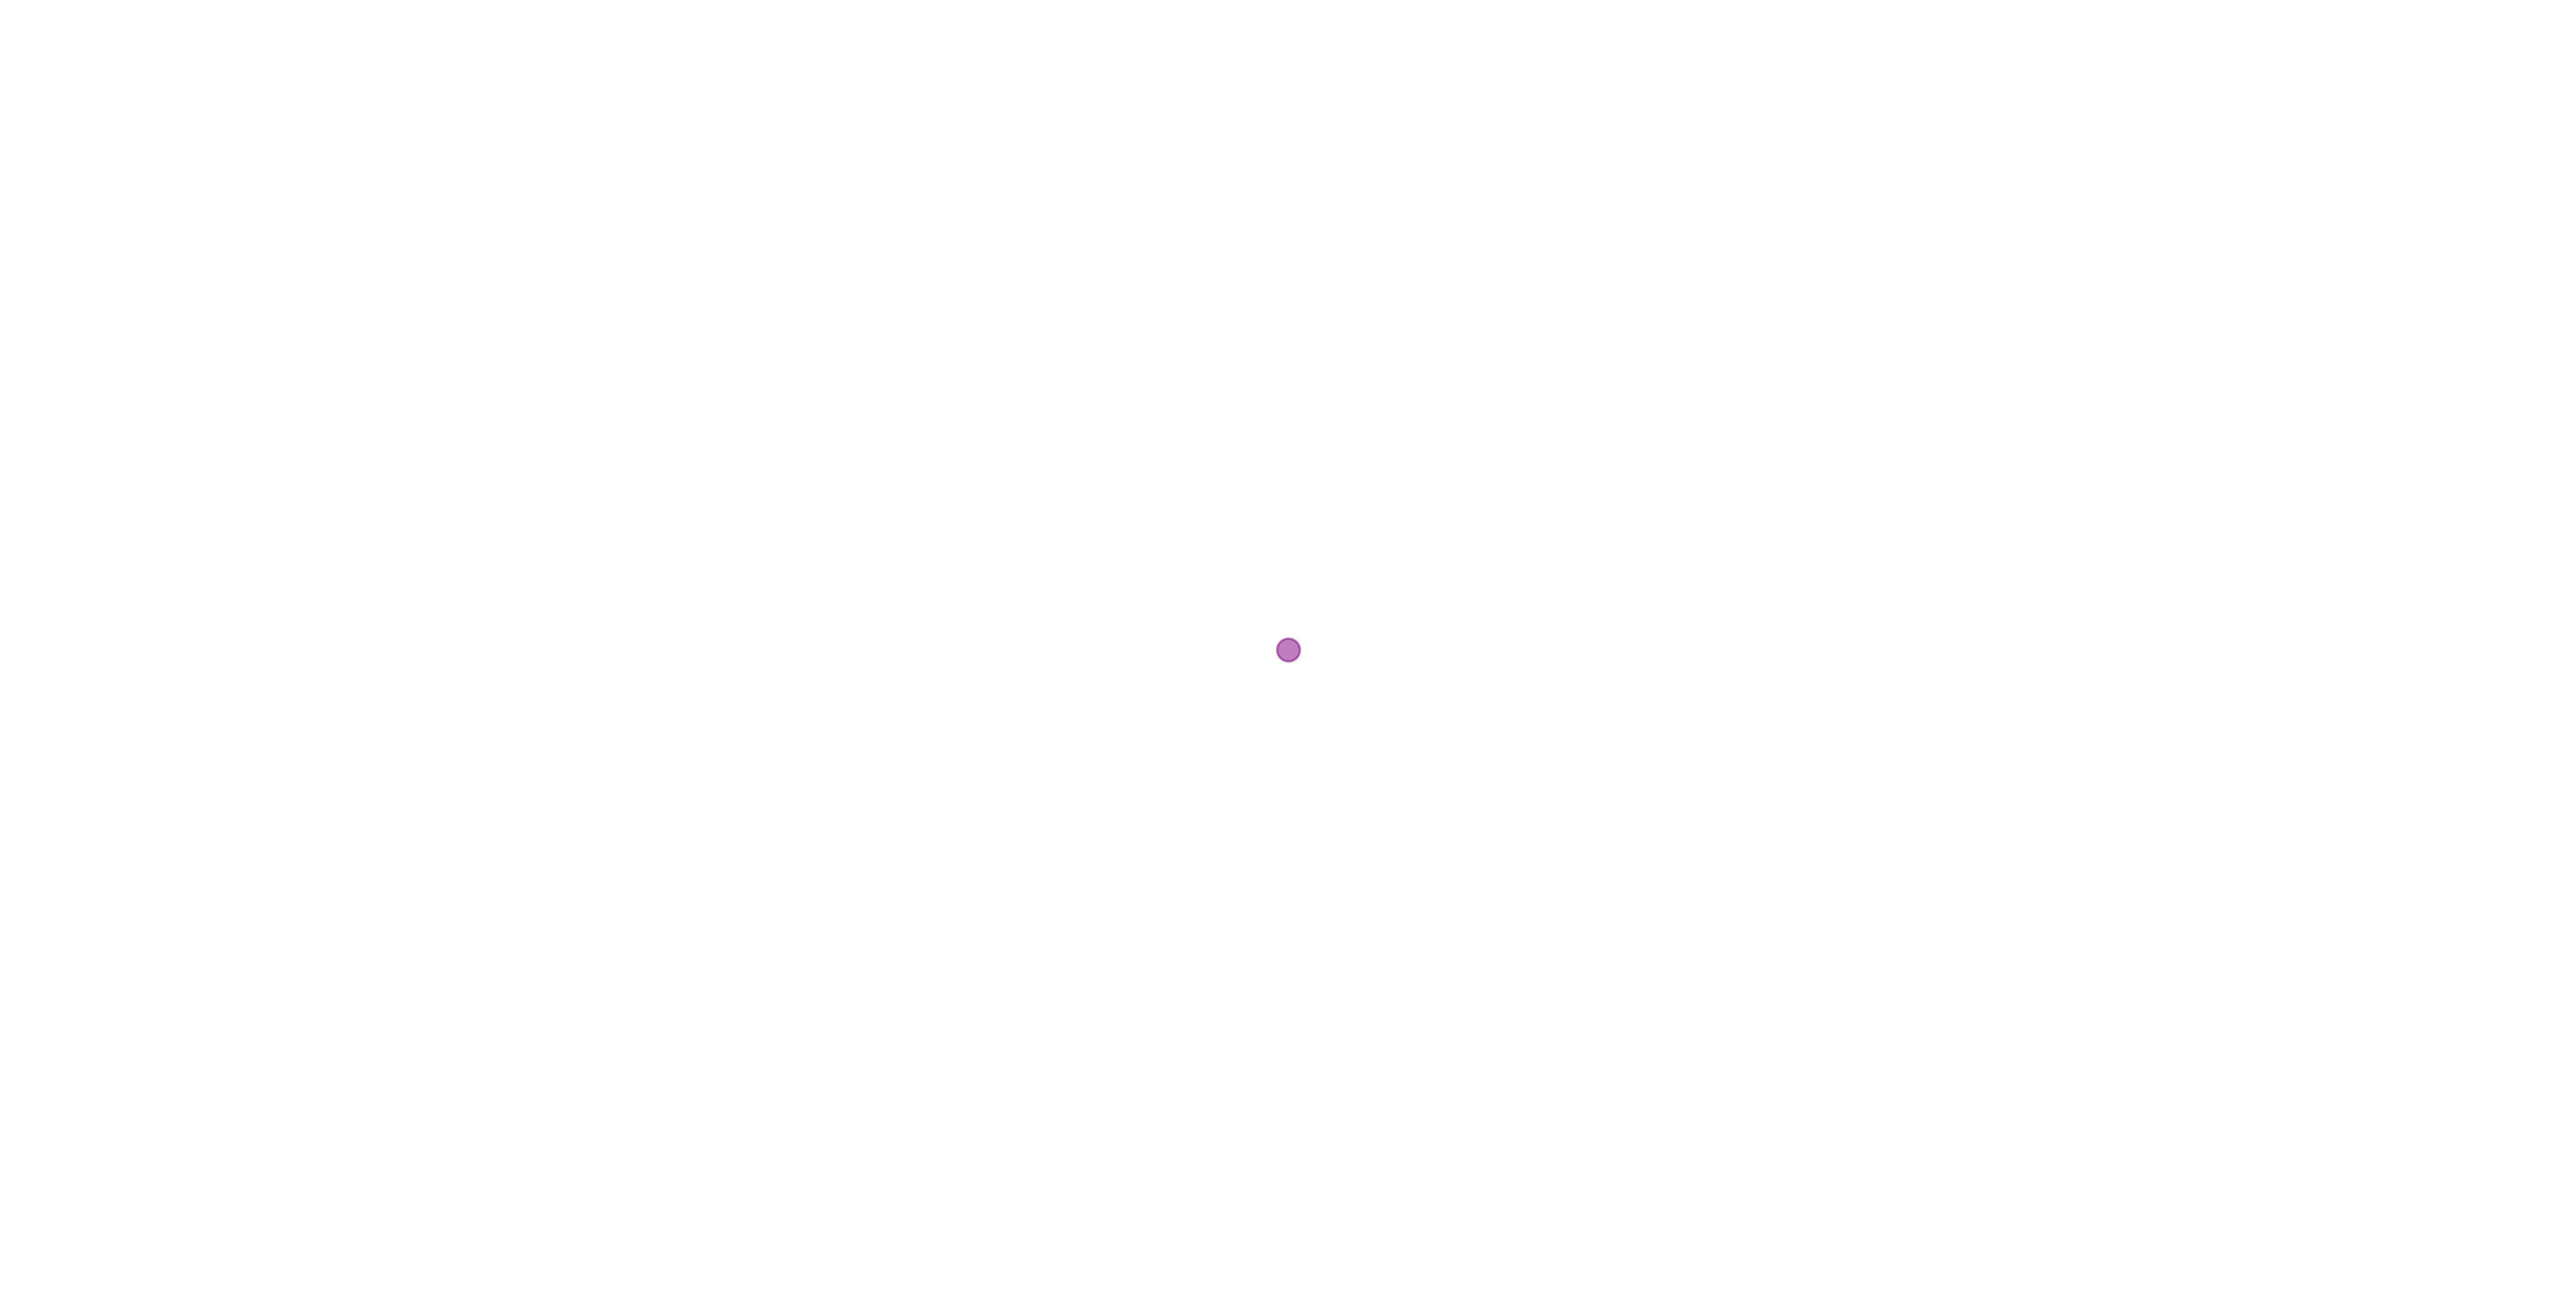

In [67]:
#purple node ABZ94905.1
connected_nodes = nx.node_connected_component(G, "CAE08072.1" )
subgraph_purple_2 = G.subgraph(connected_nodes)
pos = nx.spring_layout(subgraph_purple_2, weight='identity', iterations=200, seed=18)

# use the matplotlib plasma colormap
color_map_purpule = []
# node color varies with Degree
for v in subgraph_purple_2: 
    if v in family_1: 
        color_map_purpule.append('limegreen')
    elif v in family_2: 
        color_map_purpule.append('blue')
    elif v in family_3: 
        color_map_purpule.append('lightblue')
    elif v in family_4: 
        color_map_purpule.append('purple')
    elif v in family_5: 
        color_map_purpule.append('pink')
    elif v in family_6: 
        color_map_purpule.append('red')
    elif v in family_7: 
        color_map_purpule.append('forestgreen')
    else:
        color_map_purpule.append('papayawhip')

for v in cluster_4: 
    if v not in subgraph_purple_2: 
        purple_no_family.append(v)
        
for v in cluster_5: 
    if v not in subgraph_purple_2: 
        pink_no_family.append(v)

print(f"Purple: {purple_no_family}")
print(f"Pink: {pink_no_family}")
print(len(cluster_4))
print(len(cluster_5))

# Draw the nodes
plt.figure(figsize=(19,9))
nx.draw_networkx(subgraph_purple_2, pos=pos, with_labels=False, node_color=color_map_purpule, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

filtered proteins with coverage 1, identity 0.5 and coverage mode 0

In [68]:
rep_id_new = []
with open("./cluster_50_rep_seq.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id_new.append(record.id)

with open("./cluster_50_old_rep_seq.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id_new.append(record.id)

In [69]:
protein_list.extend(old_proteins)
len(protein_list)
len(rep_id_new)

6733

In [70]:
representatives_new = []

for rep in rep_id_new: 
    for protein in protein_list: 
        if protein.id == rep: 
            representatives_new.append(protein)

print(len(representatives_new))

6853


In [71]:
network_new = SequenceNetwork(sequences=representatives_new, weight='identity')

Output()

KeyboardInterrupt: 

In [ ]:
network_new.update_threshhold(threshold = 0.19)
# naming the network
G_new = network_new.network
weight = 'identity'

In [ ]:
df = nx.to_pandas_edgelist(G)
print(df.columns)
df.plot.hist(column=['identity'], bins=30)

In [ ]:
low_degree = [n for n, d in G_new.degree() if d < 4]
G_new.remove_nodes_from(low_degree)
#G.remove_nodes_from(network.remove_pairs())

In [ ]:
# use the matplotlib plasma colormap
color_map = []
# node color varies with Degree
for v in G_new: 
    if v in family_1: 
        color_map.append('limegreen')
    elif v in family_2: 
        color_map.append('blue')
    elif v in family_3: 
        color_map.append('lightblue')
    elif v in family_4: 
        color_map.append('purple')
    elif v in family_5: 
        color_map.append('pink')
    elif v in family_6: 
        color_map.append('orange')
    elif v in family_7: 
        color_map.append('forestgreen')
    else:
        color_map.append('papayawhip')

In [ ]:
pos = nx.spring_layout(G_new, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_new, pos=pos, with_labels=False, node_color=color_map, node_size=100,font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()